<div style="text-align: center; font-family: Arial, sans-serif">
    <h1 style="font-size: 40px; font-weight: 700; margin-bottom: 8px;">
        ALPHA TEAM JCDSOL
    </h1>
    <p style="font-size: 18px; font-weight: 500; margin-top: 0;">
        <b>Wendy Auran Petraz</b>, <b>Grace Natalie Catherine</b>
    </p>
    <hr style="border: 1px solid #ccc; width: 80%; margin: 20px auto;">
    <h2 style="font-size: 20px; font-weight: 500; margin: 8px 0;">
        Use Case: Brazilian E-Commerce Public Dataset by Olist
    </h2>
    <h2 style="font-size: 20px; font-weight: 500; margin-top: 6px;">
        Customer Segmentation with Machine Learning to Improve Customer Retention and Purchase Frequency for an E-Commerce
    </h2>
    <h2 style="font-size: 20px; font-weight: 500; margin: 6px 0;">
        Segmentasi Pelanggan dengan Machine Learning untuk Meningkatkan Retensi dan Frekuensi Pembelian Pelanggan pada E-Commerce
    </h2>
    <hr style="border: 1px solid #ccc; width: 80%; margin: 25px auto;">
</div>

# **OUTLINE**

- [**Section 0.** Import Library](#Import-Library)
- [**Section 1.** Business Understanding](#business-understanding)
- [**Section 2.** Data Understanding](#data-understanding)
- [**Section 3.** Data Cleaning](#data-cleaning)
- [**Section 4.** Exploratory Data Analysis](#exploratory-data-analysis)
- [**Section 5.** Analysis RFM & Cohort](#analysis-rfm-&-cohort-method)
- [**Section 6.** Modeling](#modeling)
- [**Section 7.** Conclusion and Recommendation](#conclusion-and-recommendation)

# **Import Library**

Import library yang diperlukan untuk analisis data, visualisasi, dan model machine learning.

In [1]:
# Data manipulation & data analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import squarify

# Data preprocessing and preparation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# Modelling (Clustering)
from sklearn.cluster import KMeans

# Metrics
from sklearn.metrics import silhouette_score

# Save model
import pickle

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 2000)

# **Business Understanding**

## **Background (Context and Business Overview)**

Pasar e-commerce Brazil menunjukkan pertumbuhan yang sangat pesat, diproyeksikan meningkat dari USD 69,21 miliar (2026) menjadi USD 150,91 miliar (2031) dengan CAGR 17–19%. Pertumbuhan ini didorong oleh tingginya penetrasi internet dan smartphone, populasi muda yang melek digital, serta ekspansi kelas menengah dengan daya beli yang meningkat.

Adopsi sistem pembayaran instan Pix dan peningkatan infrastruktur logistik, termasuk pengiriman <24 jam di kota besar, hal ini semakin mempercepat transaksi online. Namun, pertumbuhan ini juga meningkatkan intensitas persaingan, ditandai dengan investasi besar dari berbagai pemain e-commerce di Brasil.

Source: [Mordor Intelligence](https://www.mordorintelligence.com/industry-reports/brazil-ecommerce-market) and [Market Report Analytics](https://www.marketreportanalytics.com/reports/ecommerce-market-in-brazil-90143)

### **About Company and the Business Core**
[Olist](https://olist.com/) adalah salah satu marketplace e-commerce terbesar di Brazil yang berfokus pada pemberdayaan UMKM. Olist menghubungkan seller ke berbagai channel penjualan dan menyediakan dukungan logistik terintegrasi.
Alur bisnis Olist meliputi proses pemesanan, pemenuhan pesanan oleh seller, pengiriman melalui mitra logistik, serta pengumpulan customer feedback melalui survei kepuasan dan review setelah produk diterima. Model ini menghasilkan data transaksi pelanggan untuk analisis bisnis.

## **Problem Statement**

Meskipun pasar e-commerce Brazil terus berkembang, tingkat persaingan yang semakin tinggi menuntut platform seperti Olist untuk dapat **meningkatkan pembelian pelanggan** karena sumber pendapatan perusahaan berasal dari **transaksi yang dilakukan oleh pelanggan**. 

Dari data yang disediakan oleh Olist, **frekuensi pembelian pelanggan sangat rendah, mayoritas pelanggan tidak melakukan repeat buying di platform dan retention rate rendah** pada rentang 2017-2018.

Dalam literatur yang berfokus pada e-commerce di Brazil, **perilaku konsumen secara konsisten muncul sebagai salah satu topik penelitian paling signifikan untuk memahami dinamika belanja online dan pengambilan keputusan strategis**. Hal ini menegaskan bahwa memahami apa yang mendorong konsumen online di Brazil, termasuk kepercayaan, **pengalaman pengguna (user experience)**, kualitas platform, dan **pola pembelian** adalah **fondasi penting** baik bagi penelitian akademik maupun **untuk strategi bisnis praktis di e-commerce**. 

Referensi: [Source](https://www.mdpi.com/0718-1876/19/2/76)

Segmentasi berbasis perilaku secara langsung mendukung pemasaran e-commerce dengan memungkinkan:
- **Penargetan Pemasaran yang Terpersonalisasi** : Menyesuaikan penawaran dan komunikasi berdasarkan pola pembelian dan keterlibatan pelanggan.
- **Alokasi Sumber Daya yang Optimal** : Memfokuskan anggaran pemasaran pada segmen yang kemungkinan besar akan melakukan konversi atau memiliki nilai seumur hidup pelanggan (customer lifetime value) yang tinggi.
- **Sistem Rekomendasi yang Lebih Baik** : Menggunakan profil perilaku untuk rekomendasi produk yang lebih relevan, sehingga meningkatkan conversion rate dan kepuasan pelanggan. 

Referensi: [Source](https://www.mdpi.com/0718-1876/19/2/76)

Oleh karena itu, analisis ini akan berfokus untuk **memahami perilaku pelanggan** sebagai acuan untuk **menyusun strategi pemasaran dan retensi yang sesuai dengan tiap segmen pelanggan** agar dapat **meningkatkan repeat buying pelanggan** di Olist.

## **Goals**

Berdasarkan permasalahan tersebut, tujuan dari analisis ini adalah berikut:
- **Mengidentifikasi segmen pelanggan berdasarkan karakteristik pelanggan**.
- **Meningkatkan retensi dan repeat buying** pelanggan.
- **Menyusun strategi pemasaran yang sesuai untuk setiap segmen** agar strategi pemasaran lebih efektif dan anggaran pemasaran menjadi lebih optimal.
- **Membangun model machine learning untuk segmentasi customer** dengan menggunakan **KMeans**.

## **Analytical Approach**

Metode analitik yang digunakan dalam penelitian ini adalah untuk **menganalisis perilaku pelanggan berdasarkan histori transaksi** dengan menggunakan metode **clustering dengan metode K-Means** untuk **mengelompokkan pelanggan ke dalam segmen yang memiliki karakteristik perilaku yang serupa**. Metode memungkinkan identifikasi segmen pelanggan yang jelas dan menjadi dasar dalam perumusan strategi pemasaran yang lebih terpersonalisasi dan efektif untuk setiap segmen. Referensi: Adiana, P., et al. (2018). Customer Segmentation using RFM and K-Means Clustering. [Source](https://jutei.ukdw.ac.id/index.php/jurnal/article/view/76)

Untuk menyelesaikan permasalahan ini, kami akan melakukan:
1. **Exploratory Data Analysis** untuk menganalisis data yang bertujuan untuk menemukan pola perilaku pembelian pelanggan.
2. **Preprocessing data** yang mencakup pembersihan data, penanganan missing value, transformasi format data, serta penggabungan dataset transaksi, produk, dan pelanggan.
3. **Feature Engineering** dengan pemilihan feature dan scalling.
4. **Analysis (RFM & Cohort)** untuk menganalisis RFM dan retention rate dengan cohort analysis.
5. **Modelling and Interpretation** untuk mengelompokkan pelanggan berdasarkan karakteristik serupa menggunakan **machine learning model** yaitu **unsupervised learning dengan KMeans Clustering** dan menginterpretasikan karakteristik pelanggan pada tiap cluster yang terbentuk.
6. **Conclusion & Recommendation** untuk menarik kesimpulan dan memberikan rekomendasi berdasarkan data.

## **Evaluation Metrics**

Evaluasi jumlah cluster optimal dilakukan menggunakan **Elbow Method** dan **Silhouette Method**. Kedua metode ini umum digunakan pada unsupervised clustering untuk menilai kualitas pengelompokan dan menentukan nilai K yang paling optimal.

- **Elbow Method** digunakan untuk **mengevaluasi penurunan nilai SSE (Sum of Squared Errors) seiring bertambahnya jumlah cluster**. **Jumlah cluster optimal ditentukan pada titik di mana penurunan SSE mulai melambat dan membentuk pola menyerupai siku (elbow point)**, yang **menunjukkan keseimbangan antara kompleksitas model dan kualitas clustering**.

- **Silhouette Method** digunakan untuk **mengukur seberapa baik setiap data ditempatkan dalam cluster-nya dibandingkan dengan cluster lain melalui nilai silhouette (rentang −1 hingga 1)**. **Nilai silhouette yang lebih tinggi menunjukkan pemisahan cluster yang lebih baik**, dan **jumlah cluster optimal ditentukan berdasarkan nilai silhouette rata-rata tertinggi**. Metode ini digunakan sebagai **metode pendukung ketika hasil elbow plot sulit ditentukan secara visual**. 

Referensi: Jain, A. K. (2010). Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 31(8), 651–666. [Source 1](https://ieeexplore.ieee.org/document/5432696) dan Rousseeuw, P. J. (1987). Silhouettes: A graphical aid to the interpretation and validation of cluster analysis. Journal of Computational and Applied Mathematics, 20, 53–65. [Source 2](https://www.sciencedirect.com/science/article/pii/0377042787901257)

# **Data Understanding**

> Data Source: [Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

Dataset Olist Brazilian E-Commerce merupakan kumpulan data transaksi e-commerce dari platform Olist di Brazil periode 2017-2018 yang berisi informasi mengenai pemesanan, pelanggan, penjual, pembayaran, pengiriman, serta ulasan pelanggan. Dataset yang digunakan mencakup data pelanggan, pemesanan, item pemesanan, produk, kategori produk, pembayaran serta ulasan pelanggan. Setiap baris merepresentasikan satu pesanan pelanggan, yang berisi informasi lengkap mulai dari status dan waktu pemesanan, detail produk dan harga, data pelanggan, pembayaran, hingga ulasan setelah pesanan diterima. Penjelasan detail mengenai setiap kolom, disajikan pada tabel berikut.

| Nama Kolom | Tipe Data | Deskripsi |
|-----------|----------|-----------|
| order_id | Kategorikal | ID unik untuk setiap transaksi pemesanan. |
| customer_id | Kategorikal | ID customer yang melakukan pemesanan. |
| customer_unique_id | Kategorikal | ID unik customer yang konsisten meskipun melakukan pemesanan berulang. |
| seller_id | Kategorikal | ID unik penjual. |
| product_id | Kategorikal | ID unik produk. |
| review_id | Kategorikal | ID unik ulasan pelanggan. |
| order_status | Kategorikal | Status pesanan (created, approved, invoiced, shipped, delivered, canceled, unavailable). |
| order_purchase_timestamp | Datetime | Waktu saat customer melakukan pemesanan. |
| order_approved_at | Datetime | Waktu pembayaran pesanan disetujui. |
| order_delivered_carrier_date | Datetime | Waktu pesanan diserahkan ke pihak kurir. |
| order_delivered_customer_date | Datetime | Waktu pesanan diterima oleh customer. |
| order_estimated_delivery_date | Datetime | Estimasi waktu pengiriman yang diberikan sistem. |
| order_item_id | Numerik | Urutan item dalam satu pesanan. |
| shipping_limit_date | Datetime | Batas waktu pengiriman produk oleh penjual. |
| price | Numerik | Harga produk (tidak termasuk ongkos kirim). |
| freight_value | Numerik | Biaya ongkos kirim produk. |
| payment_sequential | Numerik | Urutan pembayaran dalam satu pesanan. |
| payment_type | Kategorikal | Metode pembayaran (credit_card, boleto, voucher, dll). |
| payment_installments | Numerik | Jumlah cicilan pembayaran. |
| payment_value | Numerik | Nilai pembayaran yang dilakukan customer. |
| review_score | Numerik | Skor ulasan dari customer (skala 1–5). |
| review_comment_title | Teks | Judul komentar ulasan customer (opsional). |
| review_comment_message | Teks | Isi komentar ulasan customer. |
| review_creation_date | Datetime | Waktu ulasan dibuat. |
| review_answer_timestamp | Datetime | Waktu balasan terhadap ulasan (jika tersedia). |
| customer_zip_code_prefix | Numerik | Kode pos area tempat tinggal customer. |
| customer_city | Kategorikal | Kota tempat tinggal customer. |
| customer_state | Kategorikal | Provinsi tempat tinggal customer. |
| product_category_name | Kategorikal | Nama kategori produk dalam bahasa Portugis. |
| product_category_name_english | Kategorikal | Terjemahan nama kategori produk dalam bahasa Inggris. |
| product_name_length | Numerik | Panjang nama produk (jumlah karakter). |
| product_description_length | Numerik | Panjang deskripsi produk. |
| product_photos_qty | Numerik | Jumlah foto produk. |
| product_weight_g | Numerik | Berat produk dalam gram. |
| product_length_cm | Numerik | Panjang produk (cm). |
| product_height_cm | Numerik | Tinggi produk (cm). |
| product_width_cm | Numerik | Lebar produk (cm). |

Read Dataset:

In [2]:
# Load all datasets
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')

print("Datasets loaded:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Order Items: {order_items.shape}")
print(f"Order_Payments: {order_payments.shape}")
print(f"Order_Reviews: {order_reviews.shape}")
print(f"Products: {products.shape}")
print(f"Category: {category.shape}")

# Display head() for all Datasets
datasets = {
    "customers": customers,
    "orders": orders,
    "order_items": order_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "products":products,
    "category":category}

for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    display(df.head())

Datasets loaded:
Customers: (99441, 5)
Orders: (99441, 8)
Order Items: (112650, 7)
Order_Payments: (103886, 5)
Order_Reviews: (99224, 7)
Products: (32951, 9)
Category: (71, 2)

--- CUSTOMERS ---


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



--- ORDERS ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



--- ORDER_ITEMS ---


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



--- ORDER_PAYMENTS ---


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



--- ORDER_REVIEWS ---


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53



--- PRODUCTS ---


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



--- CATEGORY ---


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## **DATA OVERVIEW**

In [3]:
# Informasi umum setiap dataset
for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    display(df.info())


--- CUSTOMERS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


--- ORDERS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


--- ORDER_ITEMS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


--- ORDER_PAYMENTS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


--- ORDER_REVIEWS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None


--- PRODUCTS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


--- CATEGORY ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

In [4]:
# Statistik deskriptif setiap dataset
for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")

    num_cols = df.select_dtypes(include='number').columns
    obj_cols = df.select_dtypes(include='object').columns

    if len(num_cols) > 0:
        display(df[num_cols].describe())

    if len(obj_cols) > 0:
        display(df[obj_cols].describe())


--- CUSTOMERS ---


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746



--- ORDERS ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



--- ORDER_ITEMS ---


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21



--- ORDER_PAYMENTS ---


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795



--- ORDER_REVIEWS ---


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4



--- PRODUCTS ---


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


,product_id,product_category_name
count,32951,32341
unique,32951,73
top,106392145fca363410d287a815be6de4,cama_mesa_banho
freq,1,3029



--- CATEGORY ---


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Secara umum, dapat dilihat bahwa:
- Terdapat beberapa kolom yang memiliki missing value dan perlu dilakukan penanganan antara lain:
    - Dataset Orders pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`
    - Dataset Order Reviews pada kolom `review_comment_title` dan `review_comment_message`
    - Dataset Products pada semua kolom kecuali `product_id`

- Terdapat beberapa kolom yang bertipe object padahal berisi data tanggal seperti `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`, `shipping_limit_date`, `review_creation_date`, dan `review_answer_timestamp`, sehingga perlu dilakukan perubahan tipe data menjadi datetime.

- Pada dataset Order Items kolom `price` dan `freight_value` memiliki range nilai yang cukup besar, sehingga perlu dilakukan pengecekan apakah terdapat outlier pada kolom tersebut. Kemudian, pada kolom `freight_value` memiliki nilai 0 yang menandakan bahwa pembelian tersebut tidak memiliki biaya pengiriman (gratis ongkir).

- Pada dataset Order Payments kolom `payment_installments` dan `payment_value` memiliki nilai 0 sehingga perlu dilakukan pengecekan apakah terdapat kesalahan atau tidak.

- Pada dataset Products kolom `product_weight_g` memiliki range nilai yang cukup besar yaitu 0-40.425 gram sehingga perlu dilakukan pengecekan dan terdapat nilai 0 yang menandakan bahwa barang tersebut tidak memiliki berat sehingga perlu dihapus dari dataset karena tidak masuk akal.

## **Data Joining (Merge semua dataset)**

In [5]:
# ===== MERGING ALL DATA =====
# Merge all customers first with orders, order_items, order_payments, order_reviews, products, category

# Merge dengan orders
df = customers.merge(orders, on='customer_id', how='left')

# Merge dengan order_items
df = df.merge(order_items, on='order_id', how='left')

# Merge dengan order_payments
df = df.merge(order_payments, on='order_id', how='left')

# Merge dengan order_reviews
df = df.merge(order_reviews, on='order_id', how='left')

# Merge dengan products
df = df.merge(products, on='product_id', how='left')

# Merge dengan category
df = df.merge(category, on='product_category_name', how='left')

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-10 22:43:29,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-15 12:10:59,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-02 18:36:47,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-17 01:59:52,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


# **Data Cleaning**

Sebelum melakukan analisis, perlu dilakukan pengecekan dan *cleaning* pada dataset terlebih dahulu. Tujuan dari proses ini adalah untuk mendeteksi anomali atau kesalahan pada dataset seperti *missing value*, *duplicate data*, *outlier*, dan fitur yang tidak relevan dengan tujuan analisis. Setiap anomali atau kesalahan pada dataset nantinya akan dilakukan penanganan untuk mendapatkan hasil analisis yang sesuai dan akurat.

In [6]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_overview = pd.DataFrame(columns=['Features', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'],
                     data=listItem)

print(f'Jumlah baris dan kolom dataset : {df.shape}')
df_overview

Jumlah baris dan kolom dataset : (119143, 37)


,Features,dataType,null,nullPercentage,unique,uniqueSample
0,customer_id,object,0,0.00,99441,"[e2584410bf1f4150b5f2334c01bff6b8, 09b4d423124d6cecc21ae4e3ddb999e3]"
1,customer_unique_id,object,0,0.00,96096,"[a180108edfd35a0ea0ec49427a321ec9, 09cded817b88ca304de62d710a1b6b51]"
2,customer_zip_code_prefix,int64,0,0.00,14994,"[2562, 3266]"
3,customer_city,object,0,0.00,4119,"[joao lisboa, dom joaquim]"
4,customer_state,object,0,0.00,27,"[SP, RO]"
5,order_id,object,0,0.00,99441,"[bf00ad2335cd5715823f0f1980a8e8ab, 824ea549426913275fcda582fe4fc0d1]"
6,order_status,object,0,0.00,8,"[shipped, approved]"
7,order_purchase_timestamp,object,0,0.00,98875,"[2018-05-21 14:47:03, 2018-05-16 15:06:26]"
8,order_approved_at,object,177,0.15,90733,"[2018-02-21 12:03:31, 2018-01-05 10:48:23]"
9,order_delivered_carrier_date,object,2086,1.75,81018,"[2018-07-17 06:47:00, 2017-08-29 16:13:11]"


## **Missing Value**

In [7]:
# Persentase missing value setiap kolom
(df.isna().sum()/df.shape[0]*100).round(2)

customer_id                       0.00
customer_unique_id                0.00
customer_zip_code_prefix          0.00
customer_city                     0.00
customer_state                    0.00
order_id                          0.00
order_status                      0.00
order_purchase_timestamp          0.00
order_approved_at                 0.15
order_delivered_carrier_date      1.75
order_delivered_customer_date     2.87
order_estimated_delivery_date     0.00
order_item_id                     0.70
product_id                        0.70
seller_id                         0.70
shipping_limit_date               0.70
price                             0.70
freight_value                     0.70
payment_sequential                0.00
payment_type                      0.00
payment_installments              0.00
payment_value                     0.00
review_id                         0.84
review_score                      0.84
review_comment_title             88.26
review_comment_message   

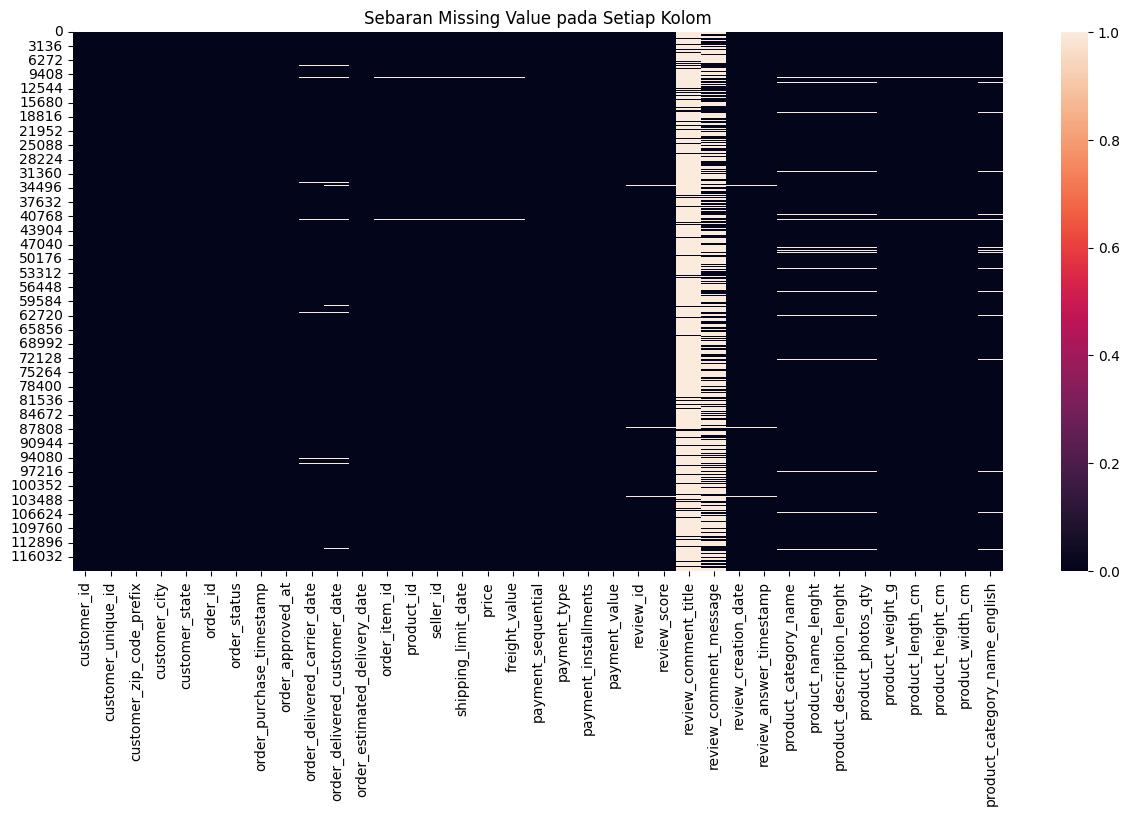

In [8]:
# Sebaran missing value pada dataset
plt.figure(figsize = (15,7))
sns.heatmap(df.isna())
plt.title('Sebaran Missing Value pada Setiap Kolom', size=12)

plt.show()

Berdasarkan perhitungan persentase missing value dan grafik di atas, dapat diketahui bahwa terdapat beberapa kolom yang memiliki missing value sebagai berikut:
- Kolom `order_approved_at` memiliki persentase missing value sebesar 0,15%.

- Kolom `order_delivered_carrier_date` memiliki persentase missing value sebesar 1,75% dan memiliki persebaran yang acak.
- Kolom `order_delivered_customer_date` memiliki persentase missing value sebesar 2,87% dan memiliki persebaran yang acak.
- Kolom `order_item_id`, `product_id`, `seller_id`, `shipping_limit_date`, `price`, `freight_value` memiliki persentase missing value yang sama yaitu sekitar 0,7% dan memiliki persebaran missing value yang sama.
- Kolom `payment_sequential`, `payment_type`, `payment_installments`, dan `payment_value` memiliki jumlah missing value yang sama yaitu 3 dan tergolong sangat kecil.
- Kolom `review_id`, `review_score`, `review_creation_date`, dan `review_answer_timestamp` memiliki persentase missing value yang sama yaitu 0,84% dan memiliki persebaran missing value yang sama.
- Kolom `review_comment_title` memiliki persentase missing value yang besar yaitu 88,26%.
- Kolom `review_comment_message` memiliki persentase missing value yang besar yaitu 57,83%.
- Kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm` memiliki persentase missing value yang sama yaitu sekitar 0,72% dan memiliki persebaran missing value yang sama.
- Kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, dan `product_category_name_english` memiliki persentase missing value yang hampir sama yaitu 2,13% dan memiliki persebaran yang sama. Kolom-kolom tersebut tidak dapat diisi sendiri karena tidak terdapat referensi mengenai detail dari produk aslinya seperti nama produk.


**Penanganan Missing Value**:
- Pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` nilai missing value akan dihapus dari dataset karena memiliki nilai missing value yang cenderung kecil dan tidak dapat diisi dengan alasan yang kuat.

- Pada kolom `review_comment_title` dan `review_comment_message` akan dilakukan penghapusan kolom dari dataset karena memiliki persentase missing value terlalu besar.
- Pada kolom yang lain, nilai missing value akan dihapus dari dataset karena memiliki persentase missing value yang cenderung kecil dan memiliki persebaran missing value yang sama sehingga mengakibatkan baris tersebut kehilangan banyak informasi dan juga tidak dapat diisi dengan alasan yang kuat.

In [9]:
# Menghapus baris yang memiliki missing value
df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'price', 'payment_type', 'review_score', 'product_category_name', 'product_name_lenght', 'product_weight_g'], inplace = True)

# Drop kolom review_comment_title dan review_comment_message
df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

# Cek kembali apakah masih ada missing value
df.isnull().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
payment_sequential                0
payment_type                      0
payment_installments              0
payment_value                     0
review_id                         0
review_score                      0
review_creation_date              0
review_answer_timestamp           0
product_category_name             0
product_name_lenght         

In [10]:
df[df['product_category_name_english'].isna()]['product_category_name'].value_counts()

product_category_name
portateis_cozinha_e_preparadores_de_alimentos    14
pc_gamer                                          9
Name: count, dtype: int64

Berdasarkan pengecekan tersebut terlihat bahwa masih ada missing value pada kolom `product_category_name_english` dan setelah dilakukan pengecekan ternyata ada 2 kategori yang belum diterjemahkan. Oleh karena itu, akan dilakukan pengisian pada missing value tersebut dengan terjemahannya dalam bahasa inggris.

In [11]:
# Mengisi missing value pada kategori produk
df.loc[
    df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos',
    'product_category_name_english'
] = 'portable_kitchen_and_food_preparators'

df.loc[
    df['product_category_name'] == 'pc_gamer',
    'product_category_name_english'
] = 'pc_gamer'

df[(df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos') | (df['product_category_name'] == 'pc_gamer')].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
2583,416d7934b96e1c5d46b332d32ee0e356,6a3edb309612a38197be6e1bcb0d3dea,36918,sao joao do manhuacu,MG,542dd8c7a80f7006b56c9cbb95e6433b,delivered,2018-07-20 17:53:08,2018-07-20 18:05:18,2018-07-24 09:39:00,...,2018-08-01 10:29:06,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,portable_kitchen_and_food_preparators
3119,e00a5ec8d72cb3c5ed58f50fb1a55cbf,b25c62ba4fc28e41117f8026bf9a31b5,23032,rio de janeiro,RJ,94f94ebc2e26aeea2aa9e8945cb9fb0c,delivered,2017-04-17 14:31:24,2017-04-17 14:45:30,2017-04-19 13:53:09,...,2017-05-06 01:43:05,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,pc_gamer
4770,3237a9ea092013b7b44c0c8d5174006d,71512541e228be5d1762945862546187,7836,franco da rocha,SP,c67c6e7178cff9848b2d6556d1670fd8,delivered,2018-07-22 13:32:50,2018-07-23 11:32:05,2018-07-24 15:07:00,...,2018-07-28 21:25:51,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,portable_kitchen_and_food_preparators
7289,c24fc4f24d2c6bd64d612774f52d6a97,f7f16795a1871264c01bd5464a30b437,25070,duque de caxias,RJ,0745fd0c5e5bd55f752798a152b1d04b,delivered,2018-08-17 15:45:42,2018-08-21 04:30:19,2018-08-21 14:53:00,...,2018-09-01 13:16:52,portateis_cozinha_e_preparadores_de_alimentos,60.0,1304.0,4.0,650.0,22.0,6.0,14.0,portable_kitchen_and_food_preparators
12159,46ae9e1a0e2b936715ed2634a524f8ab,ee5404be56619d4488a3212b84bb66d0,5885,sao paulo,SP,67f38c0b9d8a42541af92de7b6a19ea5,delivered,2018-07-27 16:59:35,2018-07-27 17:15:17,2018-07-30 12:17:00,...,2018-08-02 19:51:39,portateis_cozinha_e_preparadores_de_alimentos,48.0,305.0,1.0,750.0,20.0,20.0,20.0,portable_kitchen_and_food_preparators


In [12]:
# Cek kembali apakah masih ada missing value
df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_

Setelah dilakukan pengecekan kembali terlihat bahwa sudah tidak ada missing value lagi pada kolom `product_category_name_english`

## **Duplicated Data**

In [13]:
# Cek duplicate data
print(f'Jumlah baris yang duplikat: {df.duplicated().sum()} atau sekitar {df.duplicated().sum()/len(df)*100:.2f}%')

Jumlah baris yang duplikat: 0 atau sekitar 0.00%


Berdasarkan pengecekan tersebut terlihat bahwa tidak terdapat data yang duplikat.

## **Inconsistent Data**

### **Mengubah Tipe Data**

Pada dataset terdapat beberapa kolom yang memiliki tipe data object sedangkan dalam analisis dibutuhkan data bertipe datetime untuk melakukan analisis berdasarkan waktu sehingga perlu mengubah tipe data pada kolom tersebut menjadi datetime.

In [14]:
# Mengubah tipe data menjadi datetime
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

for col in datetime_cols:
    df[col] = pd.to_datetime(df[col])

print("Data types setelah konversi:")
print(df.dtypes)

Data types setelah konversi:
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_ins

### **Menghapus Data**

Pada dataset terdapat data transaksi dari tahun 2016-2018, namun data pada tahun 2016 hanya ada pada bulan Oktober dan Desember. Oleh karena itu, akan dilakukan penghapusan pada data tahun 2016 karena terlalu sedikit untuk di analisis dan tidak berurut secara periodik.

In [15]:
# Mengambil data dengan tahun > 2016
df = df[df['order_purchase_timestamp'].dt.year > 2016]

#### `payment_installments`

In [16]:
df[df['payment_installments'] == 0][['order_id', 'order_item_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']]

,order_id,order_item_id,payment_sequential,payment_type,payment_installments,payment_value
16436,1a57108394169c0b47d8f876acc9ba2d,1.0,2.0,credit_card,0.0,129.94
16437,1a57108394169c0b47d8f876acc9ba2d,2.0,2.0,credit_card,0.0,129.94
95519,744bade1fcf9ff3f31d860ace076d422,1.0,2.0,credit_card,0.0,58.69


Setelah dilakukan pengecekan ternyata ada 3 baris data yang memiliki `payment_installments` = 0 dengan `payment_type` yaitu kartu kredit dan `payment_sequential` = 2. Artinya, customer tersebut membayar dengan kartu kredit dan sekali bayar (bukan cicilan), tetapi transaksi ini adalah pembayaran ke-2 untuk order tersebut. Hal ini mungkin saja terjadi karena pada saat pembayaran pertama bisa saja dilakukan dengan menggunakan voucher atau pembayaran gagal/dibatalkan sehingga di pembayaran kedua langsung dibayar lunas. Oleh karena itu, data tersebut tetap dipertahankan.

#### `payment_value`

In [17]:
df[df['payment_value'] == 0][['order_id', 'order_item_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']]

,order_id,order_item_id,payment_sequential,payment_type,payment_installments,payment_value
19607,45ed6e85398a87c253db47c2d9f48216,1.0,3.0,voucher,1.0,0.0
61903,6ccb433e00daae1283ccc956189c82ae,1.0,4.0,voucher,1.0,0.0
62754,8bcbe01d44d147f901cd3192671144db,1.0,4.0,voucher,1.0,0.0
90269,b23878b3e8eb4d25a158f57d96331b18,1.0,4.0,voucher,1.0,0.0


Berdasarkan hasil pengecekan tersebut terlihat bahwa nilai `payment_value` = 0 memiliki tipe pembayaran yang sama yaitu menggunakan voucher. Artinya, customer tersebut tidak perlu melakukan pembayaran atau gratis sehingga data tersebut tetap dipertahankan.

#### `product_weight_g`

Berdasarkan hasil statistik deskriptif pada kolom `product_weight_g` terlihat bahwa terdapat barang yang memiliki nilai 0 yang artinya barang tersebut tidak memiliki berat sama sekali sehingga akan dilakukan penghapusan pada kolom tersebut.

In [18]:
# Menghapus produk dengan berat 0 gram
df = df[df['product_weight_g'] > 0]

df['product_weight_g'].describe()

count    112873.000000
mean       2106.402940
std        3765.494587
min           2.000000
25%         300.000000
50%         700.000000
75%        1800.000000
max       40425.000000
Name: product_weight_g, dtype: float64

Berdasarkan pengecekan tersebut terlihat bahwa sudah tidak ada lagi produk dengan berat sama dengan 0. 

## **Deteksi Outlier**

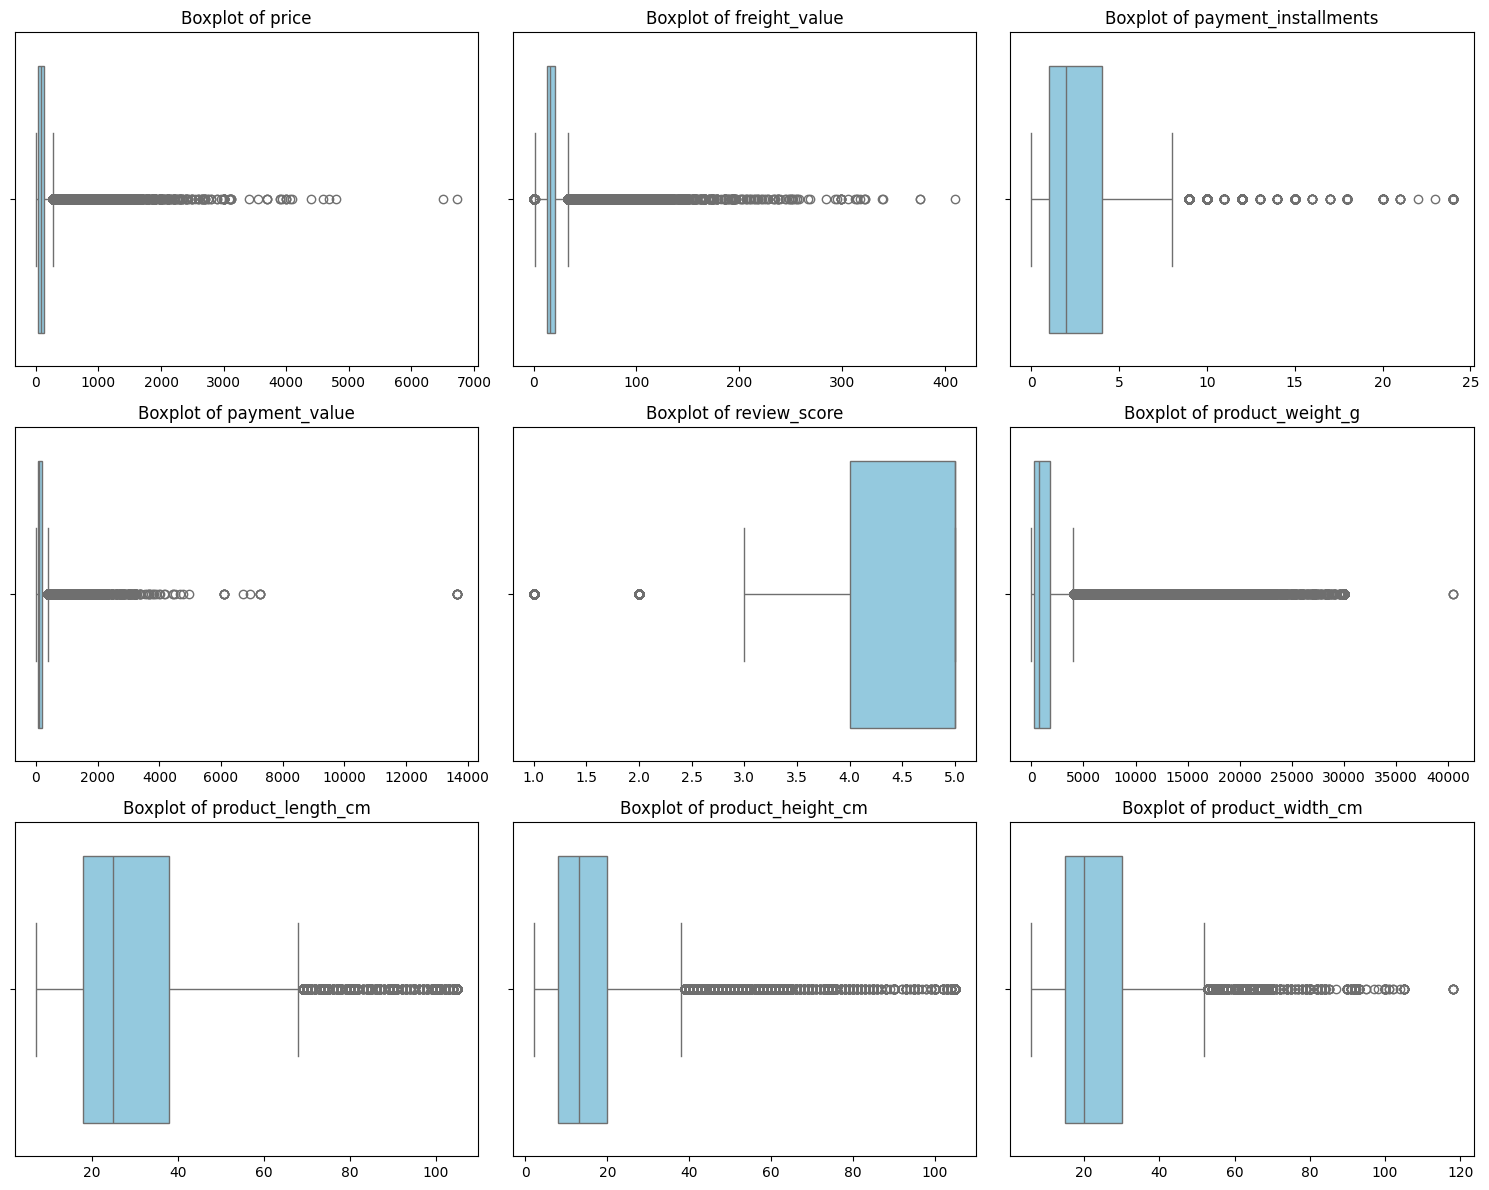

In [19]:
# Boxplot kolom numerik pada dataset
num_cols = ['price', 'freight_value', 'payment_installments', 'payment_value', 'review_score', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

if len(num_cols) > 0:
    plt.figure(figsize=(15, 12))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel('')

    plt.tight_layout()
    plt.show()

Berdasarkan hasil visualisasi boxplot di atas, diketahui bahwa semua kolom memiliki outlier dan semua outlier pada setiap kolom tersebut akan tetap dipertahankan karena:
- Outlier pada kolom `price` menunjukkan produk kategori premium misalnya elektronik, otomotif, dan furniture, sehingga menghapusnya akan menghilangkan kontribusi revenue besar. Alasan yang sama juga untuk kolom `payment_value`.

- Outlier pada kolom `freight_value` bisa terjadi karena jarak yang jauh atau barang berat/besar, sehingga akan tetap dipertahankan.
- Outlier pada kolom `payment_installments` biasa terjadi pada pembelian mahal dan menghapusnya akan menghilangkan pola kebiasaan pembayaran.
- Outlier pada kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` mewakili produk besar dan berat seperti furniture, alat berat dan lain-lain, sehingga tidak perlu dihapus.

## **Feature Generation**

### **Menambah Kolom Baru**

In [20]:
# Memecah kolom 'order_purchase_timestamp' berdasarkan tahun, bulan, hari, dan jam
df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_day'] = df['order_purchase_timestamp'].dt.day
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour

# Month-Year (Period)
df['purchase_month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

# Membuat kolom nama hari dan nama bulan
df['purchase_day_name'] = df['order_purchase_timestamp'].dt.strftime('%a')
df['purchase_month_name'] = df['order_purchase_timestamp'].dt.strftime('%b')

## **Data yang Sudah Bersih**

In [22]:
# Cek kembali info setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique()]);

df_overview = pd.DataFrame(columns=['Features', 'dataType', 'null', 'nullPercentage', 'unique'],
                     data=listItem)

print(f'Jumlah baris dan kolom dataset : {df.shape}')
df_overview

Jumlah baris dan kolom dataset : (112873, 42)


,Features,dataType,null,nullPercentage,unique
0,customer_id,object,0,0.0,94218
1,customer_unique_id,object,0,0.0,91225
2,customer_zip_code_prefix,int64,0,0.0,14822
3,customer_city,object,0,0.0,4069
4,customer_state,object,0,0.0,27
5,order_id,object,0,0.0,94218
6,order_status,object,0,0.0,2
7,order_purchase_timestamp,datetime64[ns],0,0.0,93721
8,order_approved_at,datetime64[ns],0,0.0,86315
9,order_delivered_carrier_date,datetime64[ns],0,0.0,78169


Setelah dilakukan *cleaning data*, data yang sebelumnya memiliki 119.143 baris dan 37 kolom menjadi 112.873 baris dan 42 kolom. Terdapat sekitar 6.270 baris atau sekitar 5,26% data yang kosong dan tidak relevan sudah dihapus dari dataset.

# **Exploratory Data Analysis**

In [23]:
# Menyalin df untuk digunakan analisis EDA
df_eda = df.copy()

# Drop duplicates order_id
df_order = df_eda.drop_duplicates(subset='order_id')

## **Orders Numbers Analysis**

### **Orders Number Overtime**

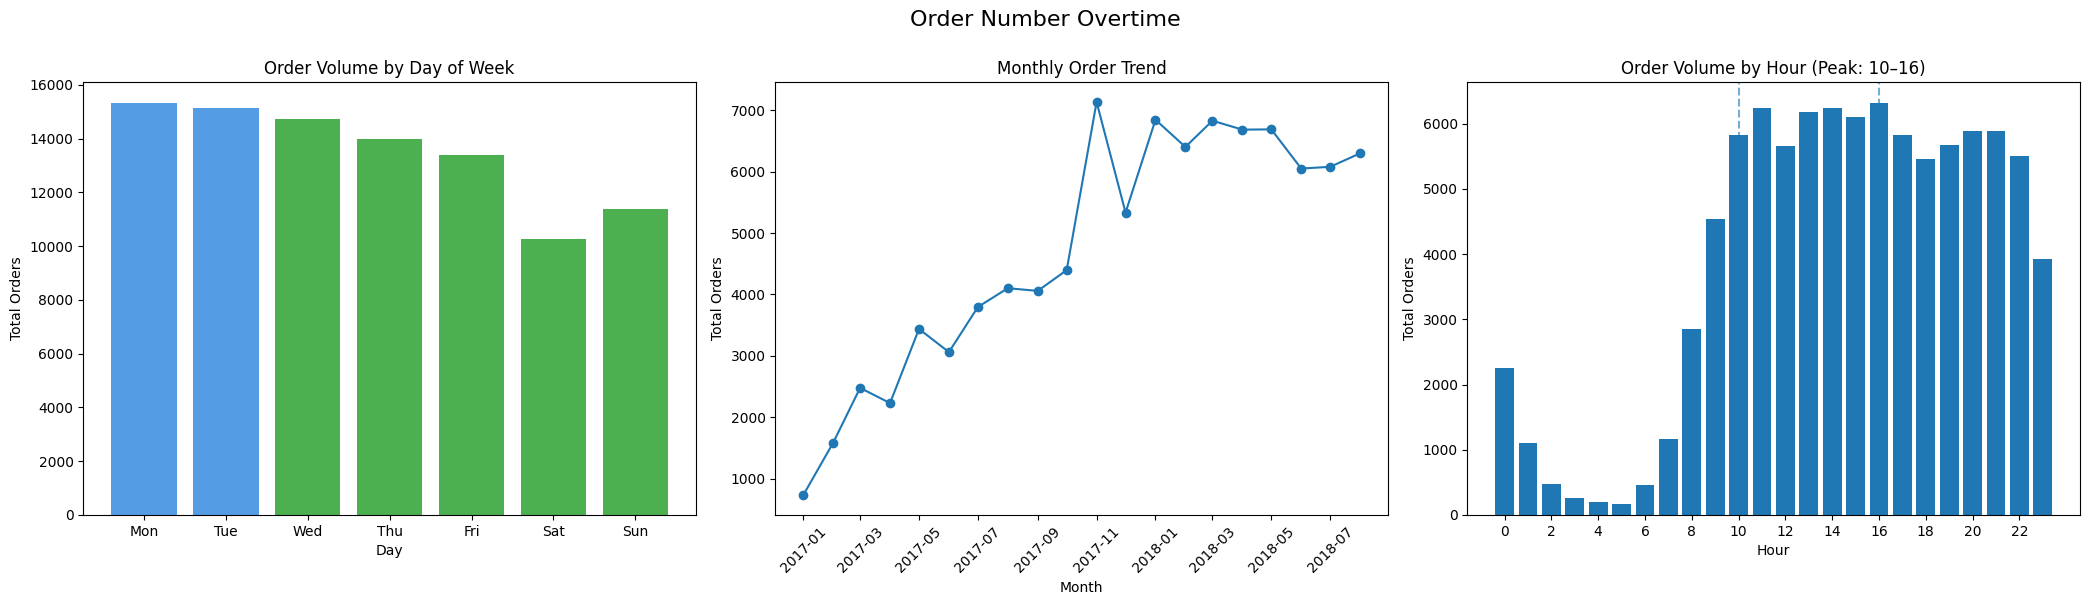

In [24]:
# AGGREGATIONS

# 1. Order by day of week
dow_orders = (
    df_order.groupby('purchase_day_name')
    .size()
    .reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
)

# 2. Monthly order trend (Period → Timestamp for plotting)
monthly_orders = (
    df_order.groupby('purchase_month_year')
    .size()
    .reset_index(name='order_count')
)
monthly_orders['purchase_month_year_ts'] = (
    monthly_orders['purchase_month_year'].dt.to_timestamp()
)

# 3. Order by hour
hourly_orders = df_order.groupby('purchase_hour').size()


# SUBPLOTS (1 x 3)
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# ---- Subplot 1: Order Volume by Day of Week ----
ax1 = axes[0]
colors = ["#549DE5" if day in ['Mon', 'Tue'] else '#4CAF50' for day in dow_orders.index]
ax1.bar(dow_orders.index, dow_orders.values, color=colors)
ax1.set_title('Order Volume by Day of Week')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Orders')

# ---- Subplot 2: Monthly Order Trend (LINE PLOT) ----
ax2 = axes[1]
ax2.plot(
    monthly_orders['purchase_month_year_ts'],
    monthly_orders['order_count'],
    marker='o'
)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.set_title('Monthly Order Trend')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Orders')
ax2.tick_params(axis='x', rotation=45)

# ---- Subplot 3: Order Volume by Hour ----
ax3 = axes[2]
ax3.bar(hourly_orders.index, hourly_orders.values)
ax3.axvline(10, linestyle='--', alpha=0.6)
ax3.axvline(16, linestyle='--', alpha=0.6)
ax3.set_title('Order Volume by Hour (Peak: 10–16)')
ax3.set_xlabel('Hour')
ax3.set_ylabel('Total Orders')
ax3.set_xticks(range(0, 24, 2))

plt.suptitle(
    'Order Number Overtime',
    fontsize=16,
    y=1
)

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas diperoleh beberapa insight antara lain:

**1. Order Volume per Hari**
- Jumlah order terbanyak berdasarkan hari terjadi pada hari Senin dan Selasa.

**2. Monthly Order Trend**
- Dari grafik **Monthly Order Trend** dapat dilihat bahwa jumlah order mengalami kenaikan dari bulan Januari tahun 2017 - bulan Agustus 2018. Terdapat peningkatan order dari mulai Oktober 2017 dan puncak lonjakan peningkatan order ada di bulan November 2017. Hal ini kemungkinan disebabkan oleh adanya perayaan black friday di Brazil, masyarakat banyak berbelanja sehingga order meningkat secara drastis di bulan November 2017.

**3. Order Volume by Hour**
- Customer banyak melakukan order dari jam 10.00 hingga 22.00. Jumlah order terbanyak berada pada Peak Hours: 10:00 - 16:00.

### **Order Numbers by City and State**

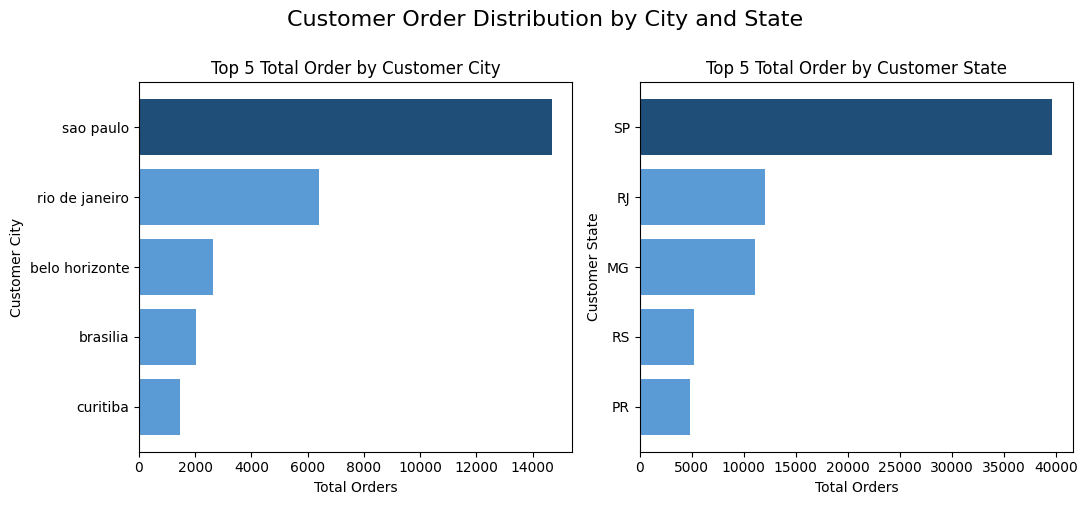

In [25]:
# Aggregation

# Customer Orders by Cities
city_orders = (
    df_order['customer_city']
    .value_counts()
    .head()
)

# Customer Orders by State
state_orders = (
    df_order['customer_state']
    .value_counts()
    .head()
)

# ===============================
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# ---- Subplot 1: Orders by City ----
city_colors = ['#1F4E79' if v == city_orders.values.max() else '#5B9BD5' for v in city_orders.values]

axes[0].barh(city_orders.index, city_orders.values, color=city_colors)
axes[0].set_title('Top 5 Total Order by Customer City')
axes[0].set_xlabel('Total Orders')
axes[0].set_ylabel('Customer City')
axes[0].invert_yaxis()

# ---- Subplot 2: Orders by State ----
state_colors = ['#1F4E79' if v == state_orders.values.max() else '#5B9BD5' for v in state_orders.values]

axes[1].barh(state_orders.index, state_orders.values, color=state_colors)
axes[1].set_title('Top 5 Total Order by Customer State')
axes[1].set_xlabel('Total Orders')
axes[1].set_ylabel('Customer State')
axes[1].invert_yaxis()

plt.suptitle(
    'Customer Order Distribution by City and State',
    fontsize=16,
    y=1
)

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas diperoleh beberapa insight antara lain:

**1. Order Numbers Distribution By City**
- Sao Paulo mendominasi jumlah order secara signifikan, diikuti oleh rio de janeiro di posisi kedua.
- Gap besar dengan kota lain menunjukkan konsentrasi demand sangat tinggi di satu kota.
- Aktivitas pelanggan sangat terpusat di kota metropolitan utama, khususnya São Paulo.
- Strategi marketing, inventory, dan fulfillment akan paling optimal jika difokuskan pada kota-kota dengan volume tinggi.

**2. Order Numbers Distribution By State**
- State Sao Paulo (SP) menjadi kontributor order terbesar secara nasional. Diikuti oleh RJ, MG, RS, dan PR sebagai tier kedua.
- Demand e-commerce masih terkonsentrasi di wilayah ekonomi utama Brazil yaitu Sao Paulo.

## **Revenue Analysis**

### **Total Revenue by Payment Values**
Berdasarkan `purchase_value` dari order yang berstatus **delivered**

In [26]:
revenue_total = (
    df_eda[df_eda['order_status'] == 'delivered']
    ['payment_value']
    .sum()
)

print(f"Total Revenue: {revenue_total:,.0f} BRL (Brazilian Real)")

Total Revenue: 19,362,028 BRL (Brazilian Real)


### **Revenue by Order**

In [27]:
revenue_per_order = (
    df_eda[df_eda['order_status'] == 'delivered']
    .groupby('order_id')['payment_value']
    .sum()
    .reset_index(name='order_revenue')
)

revenue_per_order.describe()

,order_revenue
count,94217.000000
mean,205.504613
std,610.378791
min,9.590000
25%,62.870000
50%,109.700000
75%,196.260000
max,109312.640000


Berdasarkan tabel deskriptif statistik di atas, terlihat bahwa pada periode tahun 2017-2018, Olist memiliki rata-rata revenue sebesar 205,58 BRL (Brazilian Real) dengan revenue tertinggi sebesar 109.312,64 BRL (Brazilian Real) dan revenue terendah sebesar 9,59 BRL (Brazilian Real).

### **Revenue Trend Overtime (Per Month and Per Year)**

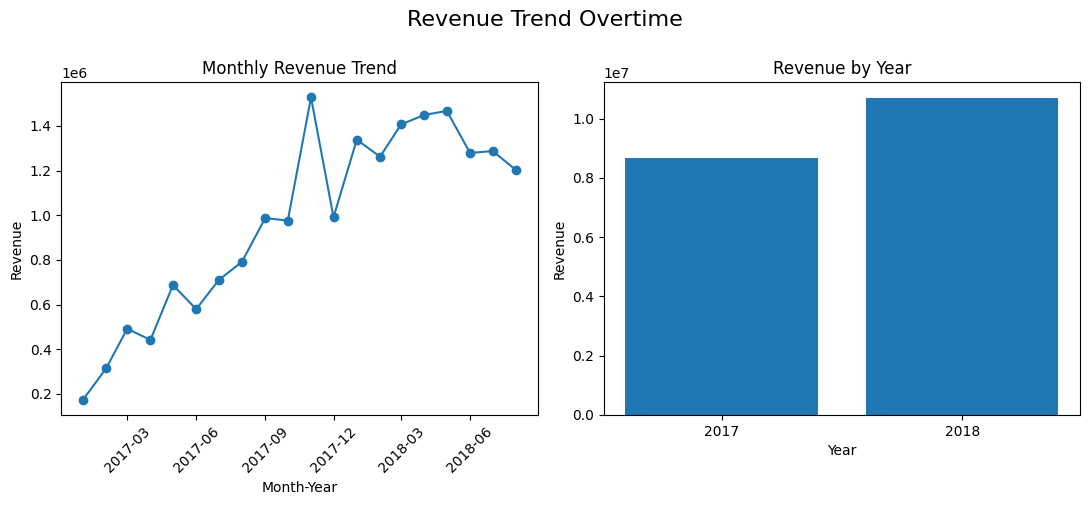

In [28]:
# AGGREGATION

# Monthly revenue (Month-Year)
monthly_revenue = (
    df_eda[df_eda['order_status'] == 'delivered']
    .groupby('purchase_month_year')['payment_value']
    .sum()
    .reset_index(name='revenue')
)

# Convert Period → Timestamp for plotting
monthly_revenue['purchase_month_year_ts'] = (
    monthly_revenue['purchase_month_year'].dt.to_timestamp()
)

# Revenue per year
yearly_revenue = (
    df_eda[df_eda['order_status'] == 'delivered']
    .groupby('purchase_year')['payment_value']
    .sum()
    .reset_index(name='revenue')
)

# =========================
# SUBPLOTS (1 x 3)
# =========================
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# ---- Subplot 1: Revenue Trend (Monthly - Line Plot) ----
ax1 = axes[0]
ax1.plot(
    monthly_revenue['purchase_month_year_ts'],
    monthly_revenue['revenue'],
    marker='o'
)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.set_title('Monthly Revenue Trend')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)

# ---- Subplot 2: Revenue per Year (Bar Plot) ----
ax3 = axes[1]
ax3.bar(
    yearly_revenue['purchase_year'],
    yearly_revenue['revenue']
)
ax3.set_title('Revenue by Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Revenue')

# set ticks
ax3.set_xticks(yearly_revenue['purchase_year'])
ax3.set_xticklabels(yearly_revenue['purchase_year'])

plt.suptitle(
    'Revenue Trend Overtime',
    fontsize=16,
    y=1
)

plt.tight_layout()
plt.show()

Berdasarkan grafik tersebut terlihat bahwa:

- Terdapat peningkatan pada tren revenue berdasarkan time series di atas dan plot di atas
- Revenue meningkat secara fluktuatif dari tahun 2017 ke 2018

## **Review Score Analysis**

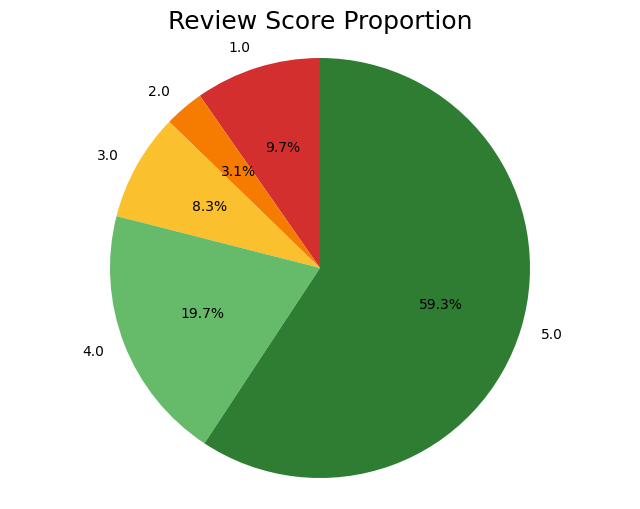

In [29]:
# Aggregation
review_summary = (
    df_order.groupby('review_score', as_index=False)['order_id']
    .count()
    .rename(columns={'order_id': 'count'})
)

# Custom colors (gradien merah → hijau, cocok untuk review)
colors = [
    '#D32F2F',  # Review 1
    '#F57C00',  # Review 2
    '#FBC02D',  # Review 3
    '#66BB6A',  # Review 4 (soft green)
    '#2E7D32'   # Review 5 (best, dark green)
]


# Plot
plt.figure(figsize=(8, 6))
plt.pie(
    review_summary['count'],
    labels=review_summary['review_score'],
    autopct='%.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Review Score Proportion', fontsize=18)
plt.axis('equal')
plt.show()

Persentase review score 1, 2 dan 3 adalah sebesar 21%. Kami mengganggap review score < 4 buruk.

Faktor-faktor yang dipelajari dalam riset ilmiah sebagai penyebab rating rendah:
- Ketidaksesuaian produk dengan deskripsi/foto di platform, konsumen merasa barang tidak seperti yang diiklankan. [Source](https://onlinelibrary.wiley.com/doi/10.1111/itor.13502?utm_source)
- Kualitas produk buruk atau tidak tahan lama, mengurangi kepuasan dan menurunkan rating. [Source](https://lembagakita.org/journal/IJMSIT/article/view/3373/?utm_source)
- Pengiriman lambat atau buruk, termasuk keterlambatan yang tidak sesuai janji platform. [Source](https://www.sciencedirect.com/org/science/article/pii/S1947924725000076?utm_source)
- Pelayanan penjual buruk / tidak responsif, pengalaman berinteraksi dengan penjual memengaruhi ulasan. [Source](https://lembagakita.org/journal/IJMSIT/article/view/3373/?utm_source)
- Negatifnya pengalaman pembeli memengaruhi persepsi risiko dan kepercayaan, ulasan negatif cenderung memperkuat risiko yang dirasakan. [Source](https://www.sciencedirect.com/org/science/article/pii/S1947924725000076)

Berdasarkan referensi tersebut, selanjutnya akan menganalisis faktor penyebab rendahnya review score. Karena variabel ketidaksesuaian produk, kualitas produk, dan pelayanan penjual tidak tersedia dalam dataset, analisis difokuskan pada delivery time. Hubungan antara delivery time dan review score dianalisis menggunakan heatmap korelasi untuk mengidentifikasi potensi pengaruh keterlambatan pengiriman terhadap rendahnya review score.

## **Delivery Time Analysis**

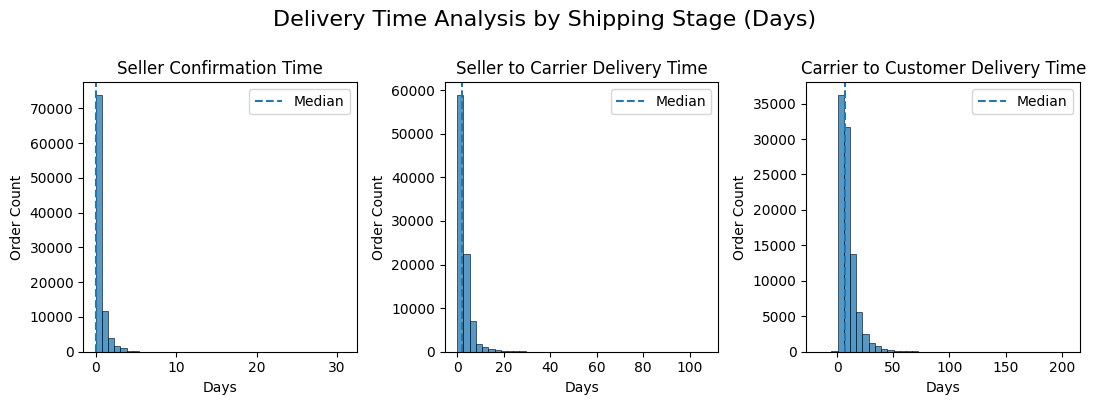

In [30]:
# ===============================
# Convert kolom timestamp
# ===============================
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'])
df_order['order_approved_at'] = pd.to_datetime(df_order['order_approved_at'])
df_order['order_delivered_carrier_date'] = pd.to_datetime(df_order['order_delivered_carrier_date'])
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order['order_delivered_customer_date'])
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order['order_estimated_delivery_date'])

# ===============================
# Delivery gap dataframe
# ===============================
df_deliv_gap = df_order[
    ['order_id', 'order_status', 'order_purchase_timestamp']
].copy()

# ===============================
# Time gap (dalam JAM)
# ===============================
df_deliv_gap['seller_confirmed_hours'] = (
    (df_order['order_approved_at'] - df_order['order_purchase_timestamp'])
    / np.timedelta64(1, 'h')
)

df_deliv_gap['seller_to_carrier_hours'] = (
    (df_order['order_delivered_carrier_date'] - df_order['order_approved_at'])
    / np.timedelta64(1, 'h')
)

df_deliv_gap['carrier_to_customer_hours'] = (
    (df_order['order_delivered_customer_date'] - df_order['order_delivered_carrier_date'])
    / np.timedelta64(1, 'h')
)

df_deliv_gap['purchase_to_carrier_hours'] = (
    (df_order['order_delivered_carrier_date'] - df_order['order_purchase_timestamp'])
    / np.timedelta64(1, 'h')
)

# ===============================
# Convert JAM → HARI
# ===============================
df_deliv_gap['seller_confirmed_days'] = df_deliv_gap['seller_confirmed_hours'] / 24
df_deliv_gap['seller_to_carrier_days'] = df_deliv_gap['seller_to_carrier_hours'] / 24
df_deliv_gap['carrier_to_customer_days'] = df_deliv_gap['carrier_to_customer_hours'] / 24
df_deliv_gap = df_deliv_gap[df_deliv_gap['seller_to_carrier_days'] > 0]

# ===============================
# Month-Year
# ===============================
df_deliv_gap['purchase_month_year'] = (
    df_deliv_gap['order_purchase_timestamp'].dt.to_period('M')
)

# ===============================
# Filter hanya delivered order
# ===============================
df_plot = df_deliv_gap[
    df_deliv_gap['order_status'] == 'delivered'
].copy()

# ===============================
# SUBPLOTS
# ===============================
fig, axes = plt.subplots(1, 3, figsize=(11, 4))

# ---- Subplot 1: Seller Confirmation Time ----
sns.histplot(
    df_plot['seller_confirmed_days'],
    bins=40,
    ax=axes[0]
)
axes[0].axvline(
    df_plot['seller_confirmed_days'].median(),
    linestyle='--',
    label='Median'
)
axes[0].set_title('Seller Confirmation Time')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Order Count')
axes[0].legend()

# ---- Subplot 2: Seller → Carrier ----
sns.histplot(
    df_plot['seller_to_carrier_days'],
    bins=40,
    ax=axes[1]
)
axes[1].axvline(
    df_plot['seller_to_carrier_days'].median(),
    linestyle='--',
    label='Median'
)
axes[1].set_title('Seller to Carrier Delivery Time')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Order Count')
axes[1].legend()

# ---- Subplot 3: Carrier → Customer ----
sns.histplot(
    df_plot['carrier_to_customer_days'],
    bins=40,
    ax=axes[2]
)
axes[2].axvline(
    df_plot['carrier_to_customer_days'].median(),
    linestyle='--',
    label='Median'
)
axes[2].set_title('Carrier to Customer Delivery Time')
axes[2].set_xlabel('Days')
axes[2].set_ylabel('Order Count')
axes[2].legend()

plt.suptitle(
    'Delivery Time Analysis by Shipping Stage (Days)',
    fontsize=16,
    y=1
)

plt.tight_layout()
plt.show()


**1. Seller Confirmation Time (Purchase → Order Approved)**
- Mayoritas order dikonfirmasi ≤ 1 hari
- Median waktu konfirmasi seller masih sangat rendah, hal ini menandakan sudah cukup efisien pada tahap order dikonfirmasi oleh seller

**2. Seller → Carrier Delivery Time (Order Approved → Dispatched to Carrier)**
- Sebagian besar order dikirim ke kurir dalam waktu yang cukup singkat
- Muncul nilai negatif → anomali timestamp
- Proses operasional relatif cepat

**3. Carrier → Customer Delivery Time (Dispatched → Delivered)**
- Tahap paling lama dan paling variatif. **Bottleneck utama berada di tahap logistik / carrier**
- Mayoritas delivery 5–20 hari.
- Banyak delivery di atas 20 hari.

Berdasarkan insight tersebut:
- **Keterlambatan pengiriman bukan disebabkan oleh seller, melainkan oleh performa carrier / last-mile delivery**. 
- Fokus perbaikan sebaiknya pada monitoring SLA carrier dan segmentasi carrier & rute yang pengirimannya membutuhkan waktu lama.

## **Review Score vs Delivery Time Correlation**

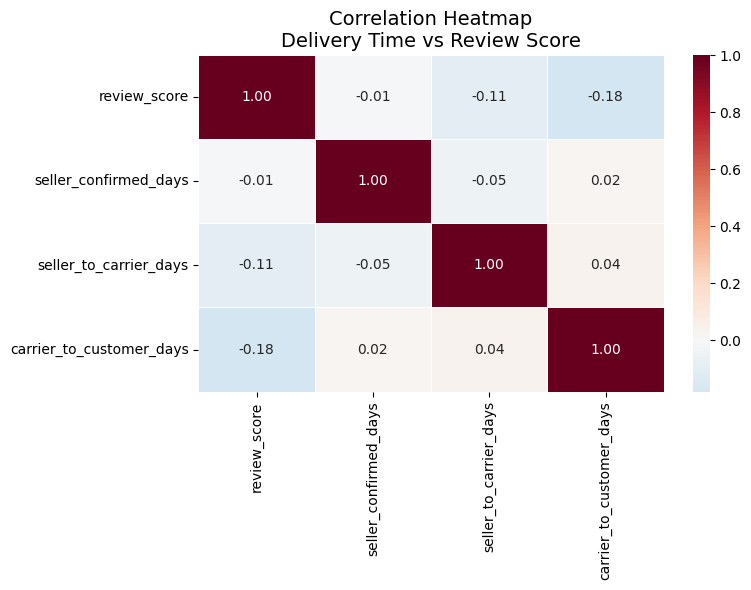

In [31]:
df_deliv_gap = df_deliv_gap.merge(
    df[['order_id', 'review_score']],
    on='order_id',
    how='left',
    suffixes=('', '_dup')
).drop(columns=['review_score_dup'], errors='ignore')

# Kolom yang dianalisis
corr_cols = [
    'review_score',
    'seller_confirmed_days',
    'seller_to_carrier_days',
    'carrier_to_customer_days'
]

# ===============================
# Hitung korelasi (Spearman)
# ===============================
corr_matrix = df_deliv_gap[corr_cols].corr(method='spearman')

# ===============================
# HEATMAP
# ===============================
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    linewidths=0.5
)

plt.title('Correlation Heatmap\nDelivery Time vs Review Score', fontsize=14)
plt.tight_layout()
plt.show()

Berdasarkan heatmap tersebut, korelasi antara review score dengan waktu pengiriman (dari mulai terkonfirmasi oleh seller, seller menyerahkan ke kurir, kurir mengirimkan ke customer) semuanya berkorelasi lemah dan arah korelasinya negatif, hal ini berarti semakin lama pengiriman, semakin rendah review score yang diberikan oleh customer.

**Adanya bottleneck keterlambatan pengiriman di tahap dari kurir menuju customer adalah salah satu penyebab review score nilainya < 4 di analisis sebelumnya mencapai 21%.**

## **Products Preference Analysis**

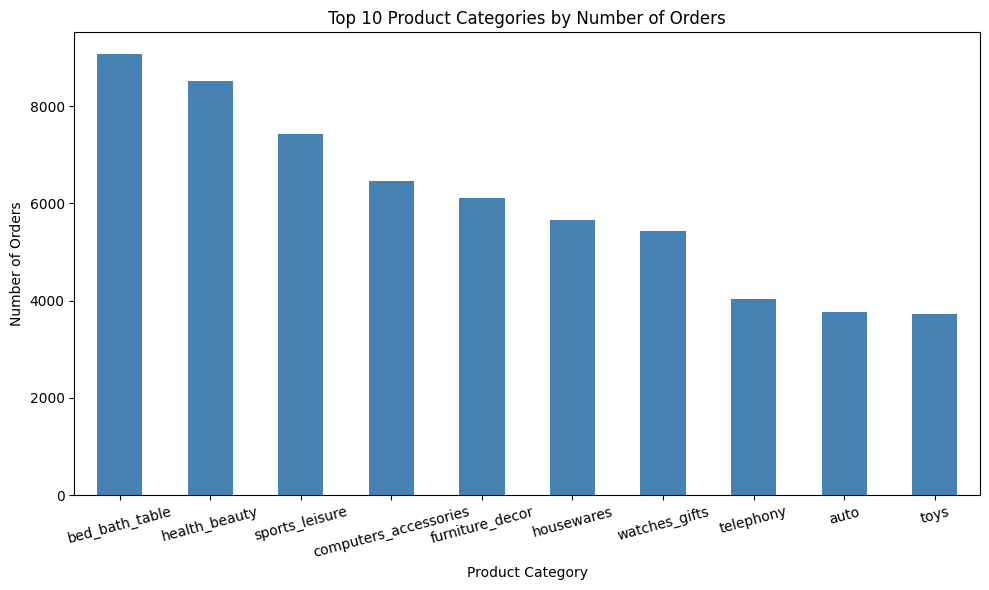

In [32]:
# Number of Orders per Product Category
top_product_order_qty = (
    df_order
    .groupby('product_category_name_english')['product_id']
    .count()
    .sort_values(ascending=False).head(10)
)

# Plot
plt.figure(figsize=(10, 6))
top_product_order_qty.plot(kind='bar', color='steelblue')

plt.title('Top 10 Product Categories by Number of Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

Berdasarkan grafik tersebut terlihat bahwa kategori produk dengan jumlah order terbanyak berasal dari kategori **bed_bath_table**, kemudian diikuti oleh **health_beauty** di posisi kedua, dan di posisi ketiga yaitu **sports_leisure**.

## **Payment Behavior Analysis**

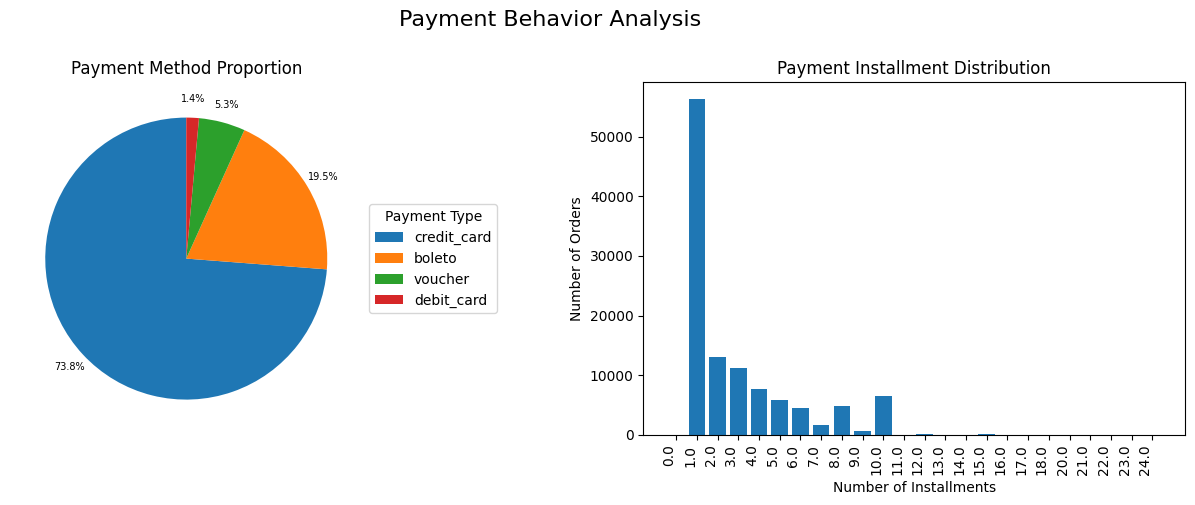

In [33]:
# Aggregation

# 1. Payment method distribution
payment_method = (
    df_eda
    .groupby('payment_type')['order_id']
    .count()
    .sort_values(ascending=False)
)

# 2. Payment installment distribution
payment_installment = (
    df_eda
    .groupby('payment_installments')['order_id']
    .count()
    .sort_index()
)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# ---- Plot 1: Payment Method (Pie Chart) ----
wedges, texts, autotexts = axes[0].pie(
    payment_method.values,
    autopct='%.1f%%',
    startangle=90,
    textprops={'fontsize': 7}
)

# Memindahkan persentase ke luar chart
for i, autotext in enumerate(autotexts):
    ang = (wedges[i].theta2 + wedges[i].theta1)/2.
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    
    autotext.set_position((x*1.13, y*1.13))
    autotext.set_ha('center')
    autotext.set_va('center')

axes[0].legend(
    wedges,
    payment_method.index,
    title='Payment Type',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

axes[0].set_title('Payment Method Proportion')

# ---- Plot 2: Payment Installments (Bar Chart) ----
axes[1].bar(
    payment_installment.index.astype(str),
    payment_installment.values
)

axes[1].set_title('Payment Installment Distribution')
axes[1].set_xlabel('Number of Installments')
axes[1].set_ylabel('Number of Orders')

plt.setp(axes[1].get_xticklabels(), rotation=90, ha='right')
plt.suptitle(
    'Payment Behavior Analysis',
    fontsize=16,
    y=1
)

plt.tight_layout()
plt.show()

Berdasarkan grafik pie terlihat bahwa bahwa metode pembayaran yang paling sering digunakan oleh customer adalah **credit card** dengan persentase sekitar 73,8% dan **boleto** dengan persentase 19,5%. Kemudian, berdasarkan grafik batang terlihat bahwa customer lebih suka membayar **lunas** atau **tanpa cicilan** yang dapat dilihat dari nilai `payment_installment` paling banyak pada angka 1.

# **Analysis (RFM & Cohort Method)**

## **RFM Analysis & Segmentation**

RFM (Recency, Frequency, Monetary) adalah salah satu metode segmentasi pelanggan berbasis perilaku pembelian yang mengukur nilai dan aktivitas customer berdasarkan data transaksi historis. Metode ini umum dipakai untuk memahami seberapa berharga dan aktifnya pelanggan, sehingga bisnis bisa membuat strategi pemasaran yang lebih tepat sasaran.

RFM digunakan untuk menilai pola perilaku pembelian pelanggan dengan tiga dimensi utama:
- **Recency**: Berapa hari sejak transaksi terakhir
- **Frequency**: Jumlah transaksi customer
- **Monetary**: Total nilai pembelian

Dengan menggabungkan ketiga metrik ini, perusahaan bisa mengklasifikasikan pelanggan menjadi segmen yang berbeda, seperti pelanggan setia, pelanggan berpotensi besar, pelanggan kurang aktif, atau pelanggan risiko hilang (churn). [Source](https://gpim.in/index.php/journal/article/view/GPM25104?)

In [34]:
# Buat RFM Features
# Reference date: tanggal terakhir dalam dataset
reference_date = df['order_purchase_timestamp'].max()

# Hitung RFM per customer
customer_rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

customer_rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

print("RFM Statistics:")
print(customer_rfm[['recency', 'frequency', 'monetary']].describe())
print(f"\nTotal Customers: {len(customer_rfm)}")

RFM Statistics:
            recency     frequency       monetary
count  91225.000000  91225.000000   91225.000000
mean     234.824697      1.032809     212.245242
std      150.904150      0.206096     631.826899
min        0.000000      1.000000       9.590000
25%      112.000000      1.000000      63.830000
50%      216.000000      1.000000     112.830000
75%      343.000000      1.000000     202.660000
max      601.000000     14.000000  109312.640000

Total Customers: 91225


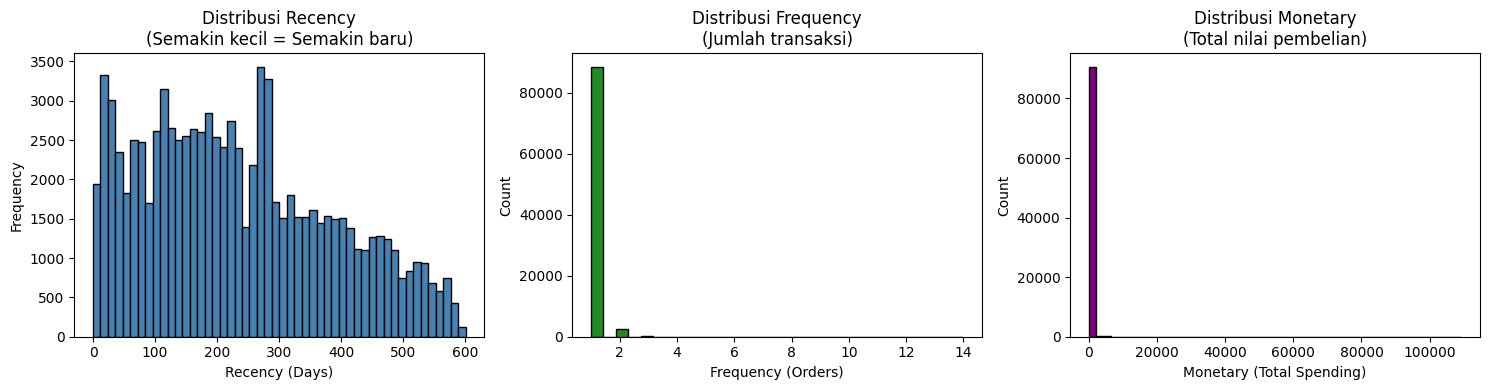

In [35]:
# Visualisasi distribusi RFM
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Recency Distribution
axes[0].hist(customer_rfm['recency'], bins=50, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribusi Recency\n(Semakin kecil = Semakin baru)')

# Frequency Distribution
axes[1].hist(customer_rfm['frequency'], bins=30, color='forestgreen', edgecolor='black')
axes[1].set_xlabel('Frequency (Orders)')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribusi Frequency\n(Jumlah transaksi)')

# Monetary Distribution
axes[2].hist(customer_rfm['monetary'], bins=50, color='purple', edgecolor='black')
axes[2].set_xlabel('Monetary (Total Spending)')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribusi Monetary\n(Total nilai pembelian)')

plt.tight_layout()
plt.show()

**Analisis Distribusi RFM**

**1. Recency**
- Mengukur lama hari sejak pembelian terakhir pelanggan.
- Histogram menunjukkan banyak pelanggan dengan recency rendah (baru beli) dan sebagian dengan recency tinggi (lama tidak beli).

**2. Frequency**
- Jumlah transaksi yang dilakukan pelanggan.
- Sebagian besar pelanggan hanya melakukan 1-2 transaksi, jumlah pembeli yang melakukan repeat order relatif sedikit.

**3. Monetary**
- Total nilai pembelian pelanggan.
- Kebanyakan pelanggan berbelanja dengan nilai kecil, sedangkan sedikit pelanggan dengan nilai besar.

## **RFM Scoring (Berdasarkan Quantile)**

Kami menggunakan nilai quantile untuk RFM Scoring berdasarkan hal berikut:

- Beberapa penelitian/implementasi menggunakan quantile scoring untuk scoring RFM yang membuat segmentasi lebih balanced dan adaptif dibanding menggunakan treshold. [Source](https://www.researchgate.net/publication/382151690_CUSTOMER_SEGMENTATION_USING_RFM_ANALYSIS)

- Quantile-based scoring membantu menangani skewed distribution (nilai R, F, M yang tidak normal) karena lebih robust terhadap outlier, quantile tidak ditarik oleh nilai extreme outlier, lebih stabil dibanding average scoring. [Source](https://www.sciencedirect.com/science/article/pii/S2090447923001430?utm_source)

Pada data terdapat banyak outliers, oleh karena itu RFM Scoring berdasarkan nilai quantile.

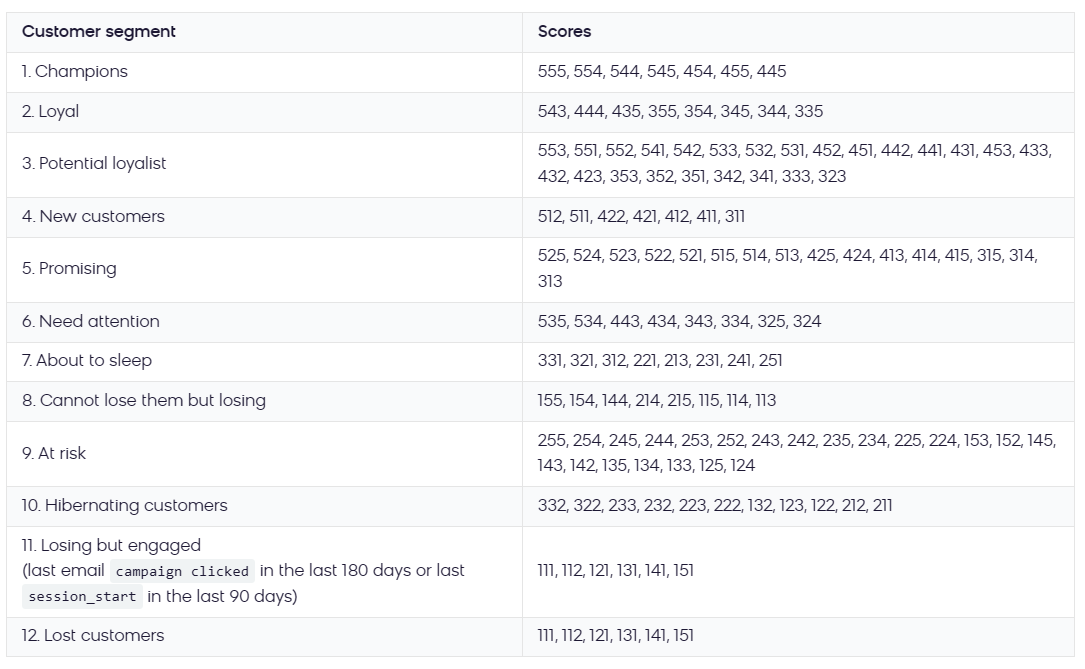

> Reference: [Segmentation by RFM](https://documentation.bloomreach.com/engagement/docs/rfm-segmentation)

In [36]:
# Recency: semakin kecil semakin baik
customer_rfm_score = customer_rfm.copy()

def r_score(x):
    if x <= customer_rfm_score['recency'].quantile(0.2):
        return 5
    elif x <= customer_rfm_score['recency'].quantile(0.4):
        return 4
    elif x <= customer_rfm_score['recency'].quantile(0.6):
        return 3
    elif x <= customer_rfm_score['recency'].quantile(0.8):
        return 2
    else:
        return 1

# Frequency: semakin besar semakin baik
def f_score(x):
    if x <= customer_rfm_score['frequency'].quantile(0.2):
        return 1
    elif x <= customer_rfm_score['frequency'].quantile(0.4):
        return 2
    elif x <= customer_rfm_score['frequency'].quantile(0.6):
        return 3
    elif x <= customer_rfm_score['frequency'].quantile(0.8):
        return 4
    else:
        return 5

# Monetary: semakin besar semakin baik
def m_score(x):
    if x <= customer_rfm_score['monetary'].quantile(0.2):
        return 1
    elif x <= customer_rfm_score['monetary'].quantile(0.4):
        return 2
    elif x <= customer_rfm_score['monetary'].quantile(0.6):
        return 3
    elif x <= customer_rfm_score['monetary'].quantile(0.8):
        return 4
    else:
        return 5

# Apply skor ke tiap pelanggan
customer_rfm_score['R_Score'] = customer_rfm_score['recency'].apply(r_score)
customer_rfm_score['F_Score'] = customer_rfm_score['frequency'].apply(f_score)
customer_rfm_score['M_Score'] = customer_rfm_score['monetary'].apply(m_score)


In [ ]:
# Melihat 5 baris teratas
customer_rfm_score.head()

,customer_unique_id,recency,frequency,monetary,R_Score,F_Score,M_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4


In [38]:
# Menambahkan RFM score
customer_rfm_score['RFM_Score'] = customer_rfm_score['R_Score'].astype(str) + customer_rfm_score['F_Score'].astype(str) + customer_rfm_score['M_Score'].astype(str)

customer_rfm_score

,customer_unique_id,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...,...
91220,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,4134.84,1,1,5,115
91221,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,2,312
91222,ffff371b4d645b6ecea244b27531430a,567,1,112.46,1,1,3,113
91223,ffff5962728ec6157033ef9805bacc48,118,1,133.69,4,1,3,413


In [ ]:
# Mapping segmen berdasarkan score RFM
map_rfm_segment = {
    # 1. Champions
    "Champions": {
        "555", "554", "455", "454"
    },
    # 2. Loyal
    "Loyal": {
        "355", "354"
    },
    # 3. Potential loyalist
    "Potential loyalist": {
        "553", "551", "552",
        "451", "453",
        "353", "352", "351", "452"
    },
    # 4. New customers
    "New customers": {
        "512", "511",
        "412", "411",
        "311"
    },
    # 5. Promising
    "Promising": {
        "515", "514", "513",
        "413", "414", "415",
        "315", "314", "313"
    },
    # 6. Need attention
    "Need attention": {
        "535"
    },
    # 7. About to sleep
    "About to sleep": {
        "312", "213", "251"
    },
    # 8. Cannot lose them but losing
    "Cannot lose them but losing": {
        "155", "154",
        "215", "214",
        "115", "114", "113"
    },
    # 9. At risk
    "At risk": {
        "255", "254", "253", "252",
        "153", "152"
    },
    # 10. Hibernating customers
    "Hibernating customers": {
        "132", "123", "122",
        "212", "211"
    },
    # 11. Lost customers
    "Lost customers": {
        "111", "112", "151"
    }
}

# Mapping score
reverse_map = {}
for segment, scores in map_rfm_segment.items():
    for score in scores:
        reverse_map[score] = segment

customer_rfm_score['segment'] = customer_rfm_score['RFM_Score'].map(reverse_map).fillna('Other')
customer_rfm_score.head()

,customer_unique_id,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4,414,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411,New customers
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112,Lost customers
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211,Hibernating customers
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214,Cannot lose them but losing


In [40]:
# Menghitung persentase setiap segmen
customer_rfm_desc = customer_rfm_score[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(['mean','median', 'min', 'max', 'count'])
customer_rfm_desc['percentage']= (100*customer_rfm_desc['monetary']["count"]/customer_rfm_desc['monetary']["count"].sum()).round(2)

customer_rfm_desc

recency                         frequency  \
                                   mean median  min  max  count      mean   
segment                                                                     
About to sleep               266.678820  267.0  176  379   7049  1.000426   
At risk                      333.747954  322.0  267  601    611  2.088380   
Cannot lose them but losing  406.964132  406.0  267  600  17425  1.020373   
Champions                     86.306144   85.0    0  175    944  2.173729   
Hibernating customers        314.088551  310.0  267  379   7363  1.000000   
Lost customers               468.306166  463.0  380  601   7460  1.001072   
Loyal                        214.897541  212.0  176  266    488  2.114754   
New customers                115.351726  114.0    0  266  18014  1.000000   
Potential loyalist           125.898361  126.0    0  266    305  2.016393   
Promising                    131.087499  131.0    0  266  31566  1.000000   

                                                     monetary           \
                            median min max  count        mean   median   
segment                                                                  
About to sleep                 1.0   1   2   7049   92.548746   90.170   
At risk                        2.0   2   6    611  455.987512  228.710   
Cannot lose them but losing    1.0   1   4  17425  358.319169  204.070   
Champions                      2.0   2  14    944  626.241758  330.030   
Hibernating customers          1.0   1   1   7363   56.768404   57.620   
Lost customers                 1.0   1   3   7460   55.902670   55.695   
Loyal                          2.0   2   9    488  500.869918  307.530   
New customers                  1.0   1   1  18014   52.271069   49.870   
Potential loyalist             2.0   2   3    305  102.801738  105.140   
Promising                      1.0   1   1  31566  302.344110  172.840   

                                                      percentage  
                                min        max  count             
segment                                                           
About to sleep                39.34     139.90   7049       7.73  
At risk                       56.86   19342.26    611       0.67  
Cannot lose them but losing   89.68  109312.64  17425      19.10  
Champions                    140.36   27935.46    944       1.03  
Hibernating customers         10.07      89.67   7363       8.07  
Lost customers                12.28      89.67   7460       8.18  
Loyal                        140.34    7723.80    488       0.53  
New customers                  9.59      89.67  18014      19.75  
Potential loyalist            37.34     139.88    305       0.33  
Promising                     89.73   44048.00  31566      34.60

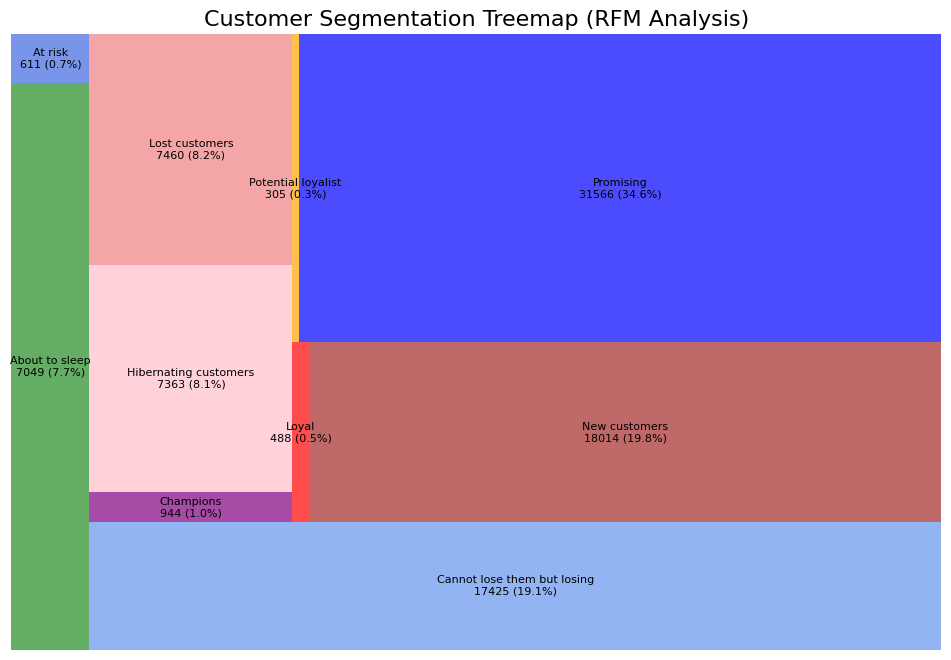

In [41]:
# Treemap plot
plt.figure(figsize=(12, 8))
plt.rc('font', size=8)

colors = [
    "forestgreen",
    "royalblue",
    "cornflowerblue",
    "purple",
    "pink",
    "lightcoral",
    "red", 
    "brown",
    "orange",
    "blue"
]

squarify.plot(
    sizes=customer_rfm_desc['percentage'],
    label=[
        f"{seg}\n{cnt} ({pct:.1f}%)"
        for seg, cnt, pct in zip(
            customer_rfm_desc.index,
            customer_rfm_desc['recency']['count'],
            customer_rfm_desc['percentage']
        )
    ],
    color=colors,
    alpha=0.7
)

plt.title("Customer Segmentation Treemap (RFM Analysis)", fontsize=16)
plt.axis('off')
plt.show()


Berdasarkan treemap terlihat bahwa:

| Segment                         | Jumlah | Persentase |
| ------------------------------- | -----: | ---------: |
| **Promising**                   | 31,566 |  **34.6%** |
| **New customers**               | 18,014 |  **19.8%** |
| **Cannot lose them but losing** | 17,425 |  **19.1%** |
| **Lost customers**              |  7,460 |       8.2% |
| **Hibernating customers**       |  7,363 |       8.1% |
| **About to sleep**              |  7,049 |       7.7% |
| **Champions**                   |    944 |       1.0% |
| **Loyal**                       |    488 |       0.5% |
| **At risk**                     |    611 |       0.7% |
| **Potential loyalist**          |    305 |       0.3% |

Total customer base didominasi segmen mid–low engagement

## **Cohort Analysis**

**Cohort Analysis** adalah metode analisis data yang **mengelompokkan pelanggan berdasarkan karakteristik atau pengalaman serupa dalam periode waktu tertentu untuk melacak pola perilaku pelanggan dari waktu ke waktu**. Teknik ini **krusial** untuk **mengukur retensi**, **mengidentifikasi titik churn (penurunan)**, dan **mengoptimalkan strategi pemasaran**.
Cohort analysis memberikan kemungkinan untuk **memodelkan perilaku pelanggan**, menyediakan fitur yang dipersonalisasi, dan membuat pengalaman pengguna secara keseluruhan lebih menarik. Cohort analysis dapat digunakan untuk mengatasi masalah tuntutan pasar yang terus berubah dan memungkinkan perwakilan bisnis untuk **mengembangkan pemahaman yang kuat tentang tipe klien baru yang bermunculan**. 


Tujuan **Cohort Analysis**:
- Pengelompokan (Cohort): User dikelompokkan berdasarkan waktu atau perilaku.
- Tujuan: **Mengidentifikasi retention rate** untuk **meningkatkan retention rate dan efisiensi pemasaran**.

Referensi:
> Solomiia Fedushko and Taras Ustyianovych. 2022. E-Commerce Customers Behavior Research Using Cohort Analysis: A Case Study of COVID-19. Journal of Open Innovation: Technology, Market, and Complexity. [Source](https://ouci.dntb.gov.ua/works/7ByLvNp9/)

In [42]:
# Duplikat df untuk analisis cohort
df_cohort = df.copy()

# Menghapus duplikat order_id
df_cohort = df_cohort.drop_duplicates(subset='order_id')

df_cohort.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,product_category_name_english,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_month_year,purchase_day_name,purchase_month_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,office_furniture,2017,5,16,15,2017-05,Tue,May
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,15.0,40.0,housewares,2018,1,12,20,2018-01,Fri,Jan
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,52.0,17.0,office_furniture,2018,5,19,16,2018-05,Sat,May
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,51.0,28.0,office_furniture,2018,3,13,16,2018-03,Tue,Mar
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,15.0,35.0,home_confort,2018,7,29,9,2018-07,Sun,Jul


Pada analisis ini, kami menggunakan waktu pembelian pertama pelanggan sebagai dasar pembentukan cohort karena waktu tersebut merepresentasikan awal hubungan pelanggan dengan perusahaan, memungkinkan analisis retensi pelanggan dari waktu ke waktu secara lebih akurat, serta memudahkan perbandingan performa pelanggan antar periode akuisisi yang berbeda.

In [43]:
# Ubah data type ke date time
df_cohort['order_purchase_timestamp'] = pd.to_datetime(df_cohort['order_purchase_timestamp'])

# Ambil kolom customer id dan order purchase 
df_cohort = df_cohort[['customer_unique_id', 'order_purchase_timestamp']]

# Buat cohort month dari cohort date
df_cohort['cohort_month']=df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

# Ubah current activity date as current month
df_cohort['current_month'] = df_cohort["order_purchase_timestamp"].dt.to_period("M")

# Aggregasi cohort_month dan current_month
df_cohort = df_cohort.groupby(["cohort_month", "current_month"]).agg(n_customers=("customer_unique_id", "nunique")).reset_index(drop=False)

from operator import attrgetter

# Periode = saat ini - cohort
df_cohort['period_month']=(df_cohort['current_month']-df_cohort['cohort_month']).apply(attrgetter('n'))

df_cohort.head()

,cohort_month,current_month,n_customers,period_month
0,2017-01,2017-01,697,0
1,2017-01,2017-02,2,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4


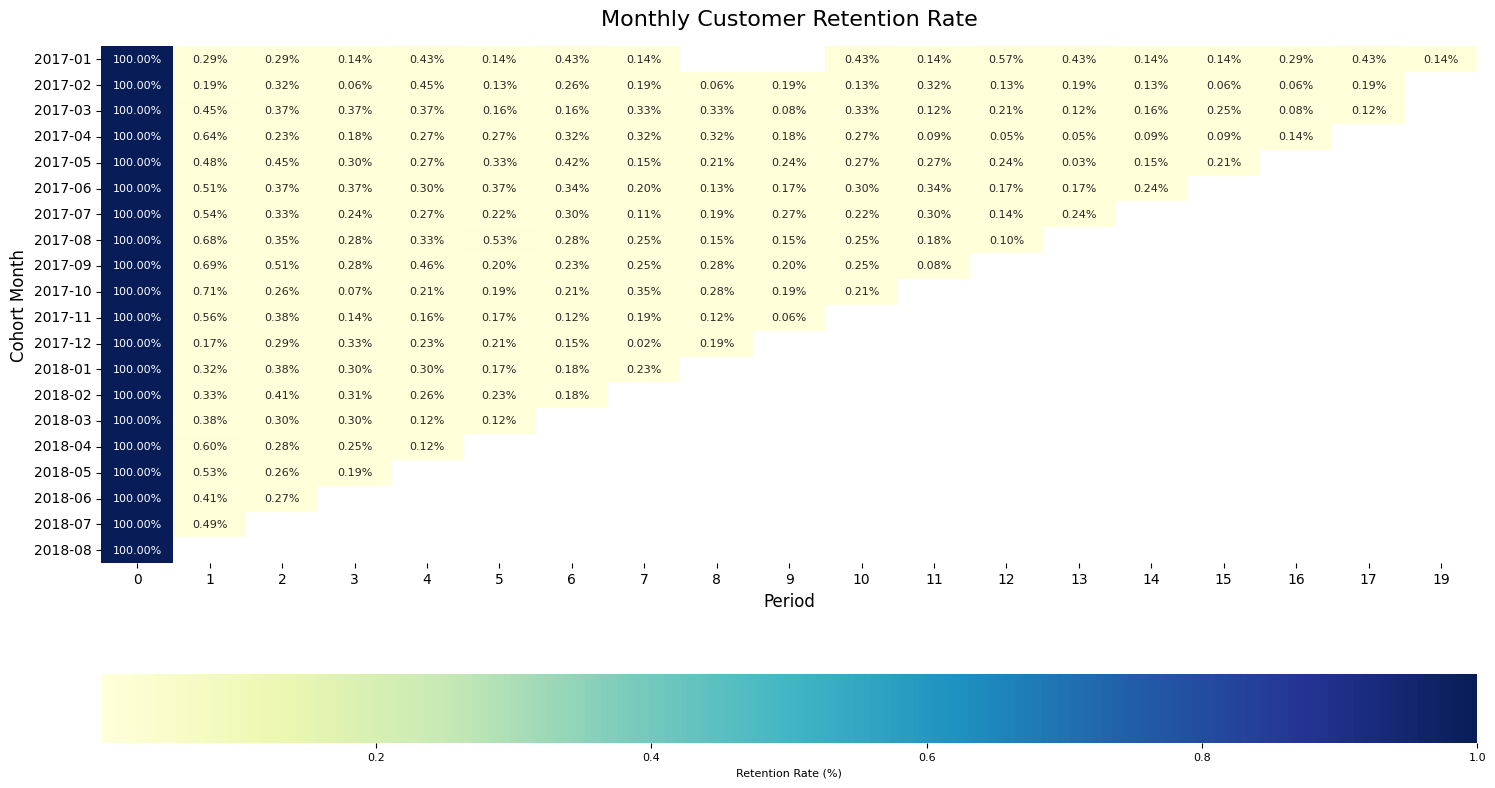

In [44]:
# Buat pivot table
pivot_cohort = df_cohort.pivot_table(
    index='cohort_month',
    columns='period_month',
    values='n_customers'
)

pivot_cohort

# Ubah ke retention rate
cohort_size = pivot_cohort.iloc[:, 0]  # jumlah customer di bulan pertama
cohort_retention = pivot_cohort.divide(cohort_size, axis=0)

# Membuat plot cohort
plt.figure(figsize=(15, 8))

ax = sns.heatmap(
    cohort_retention,
    annot=True,
    fmt='.2%',
    cmap="YlGnBu",
    linecolor="white",
    cbar_kws={
        'label': 'Retention Rate (%)',
        'orientation': 'horizontal'
    },
    annot_kws={"size": 8}
)

plt.title("Monthly Customer Retention Rate", fontsize=16, pad=15)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Cohort Month", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Dari grafik, dapat dilihat bahwa **retention rate customer di Olist sangat rendah, persentasenya di bawah 1%**. Hal ini sejalan dengan analisis distribusi RFM sebelumnya bahwa mayoritas pelanggan hanya pernah bertransaksi satu kali dan tidak melakukan pembelian berikutnya.

# **Modeling**

## **Customer Segmentation Using KMeans Clustering**

Memilih fitur yang akan digunakan untuk pemodelan K-Means Clustering. Fitur yang akan digunakan antara lain:
- **Recency** – Mengukur seberapa baru customer melakukan pembelian; membantu membedakan customer aktif dan tidak aktif.
- **Frequency** – Menunjukkan seberapa sering customer membeli; penting untuk mengidentifikasi loyalitas dan pelanggan rutin.
- **Monetary** – Total pengeluaran customer; berguna untuk menemukan customer bernilai tinggi vs rendah.
- **Payment Installments** – Pola cicilan yang dipilih; menambah insight perilaku pembayaran dan preferensi finansial.
- **Price** – Rata-rata harga produk yang dibeli; membantu membedakan segmen premium vs budget.
- **Review Score** – Rating atau feedback customer; menilai kepuasan dan engagement pelanggan.

In [45]:
# Duplikat df untuk modelling
df_model = df.copy()

# Menghapus duplikat order_id
df_model = df_model.drop_duplicates(subset='order_id')

# Masukkan kolom recency ke df
df_model = df_model.merge(customer_rfm, on='customer_unique_id', how='left')

# Memilih fitur yang akan digunakan
fitur_kmeans = ['recency', 'frequency', 'monetary', 'payment_installments', 'price', 'review_score']

### **Memilih Jumlah Cluster Optimal**

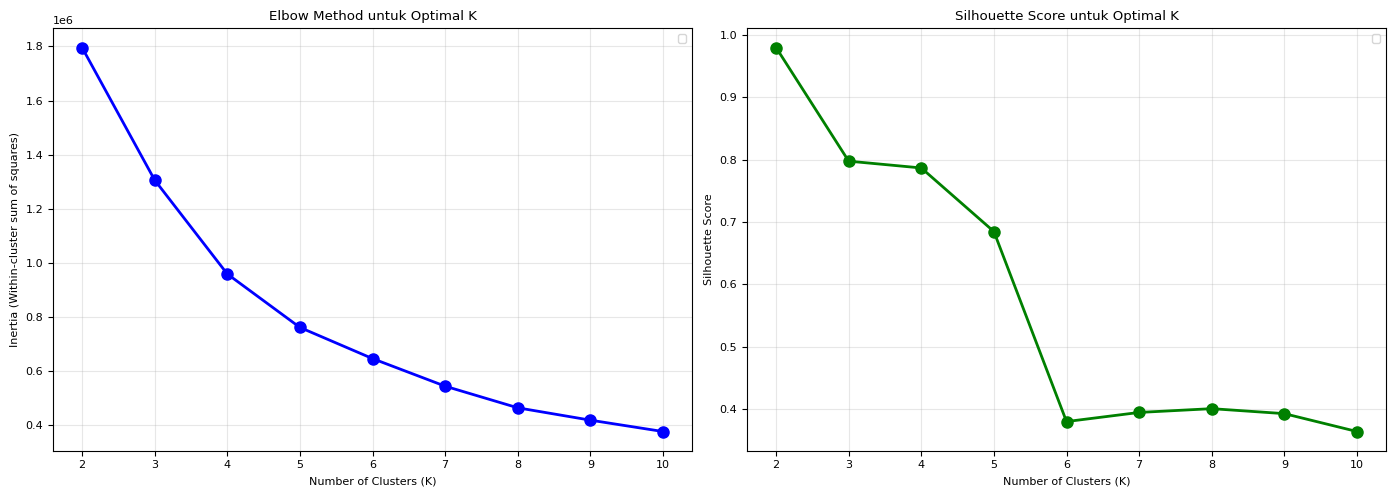

Silhouette Scores:
K=2: 0.9795
K=3: 0.7974
K=4: 0.7865
K=5: 0.6846
K=6: 0.3802
K=7: 0.3949
K=8: 0.4009
K=9: 0.3929
K=10: 0.3643


In [46]:
# Scaling RFM features untuk K-Means
scaler_model = RobustScaler()
kmeans_scaled = scaler_model.fit_transform(df_model[fitur_kmeans])

# Range K
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(kmeans_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(kmeans_scaled, labels))

# Visualisasi Elbow Method
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Curve
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)')
axes[0].set_title('Elbow Method untuk Optimal K')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score untuk Optimal K')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print hasil
print("Silhouette Scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: {score:.4f}")

### **K-Means Clustering**

`K = 2`

In [47]:
# Membuat pipeline
pipeline2 = Pipeline([
    ("scaler", RobustScaler()),
    ("kmeans", KMeans(n_clusters=2, random_state=42, n_init=10))
])

# Fit K-Means dengan K=2
fitur_kmeans = ['recency', 'frequency', 'monetary', 'payment_installments', 'price', 'review_score']
df_model['cluster'] = pipeline2.fit_predict(df_model[fitur_kmeans])

# Hitung statistik per cluster untuk labeling
cluster_summary = df_model.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'payment_installments': 'mean',
    'price': 'mean',
    'review_score': 'mean'
}).reset_index()
cluster_summary.columns = ['Cluster', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Avg Payment Installment', 'Avg Price', 'Avg Review Score']

print("="*70)
print("CLUSTER SUMMARY")
print("="*70)
print(cluster_summary.to_string(index=False))

# Label clusters berdasarkan karakteristik RFM
# Sort by Monetary descending untuk assign label
cluster_summary_sorted = cluster_summary.sort_values('Avg Price', ascending=False)

CLUSTER SUMMARY
 Cluster  Avg Recency  Avg Frequency  Avg Monetary  Avg Payment Installment  Avg Price  Avg Review Score
       0   234.191800       1.073764    215.769246                 2.912891 125.053426          4.158495
       1   183.538462       1.692308  25998.377308                 4.730769 398.630769          2.538462


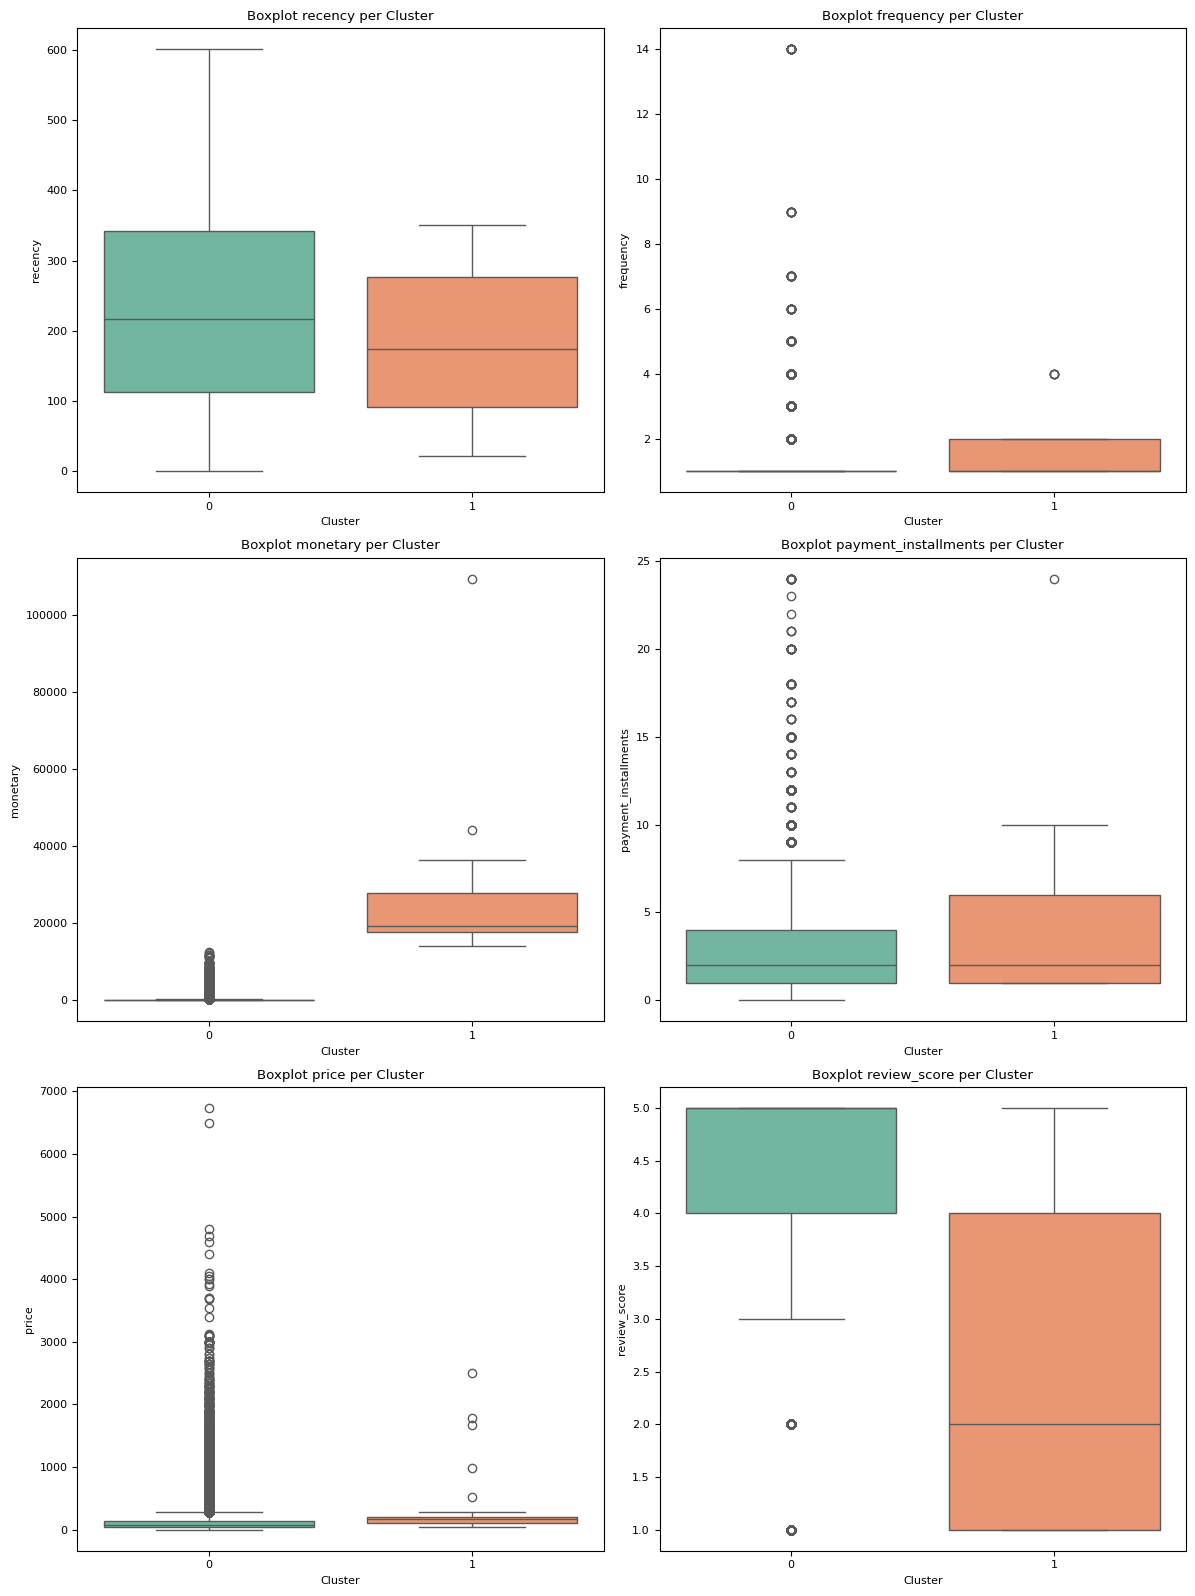

In [48]:
# Boxplot variabel setiap cluster K=2
fitur_boxplot = ['recency', 'frequency', 'monetary', 'payment_installments', 'price', 'review_score']

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()

# Loop boxplot
for i, feature in enumerate(fitur_boxplot):
    sns.boxplot(
        x='cluster',
        y=feature,
        data=df_model,
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f'Boxplot {feature} per Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

`K = 3`

In [49]:
# Membuat pipeline
pipeline3 = Pipeline([
    ("scaler", RobustScaler()),
    ("kmeans", KMeans(n_clusters=3, random_state=42, n_init=10))
])

# Fit K-Means dengan K=3
fitur_kmeans = ['recency', 'frequency', 'monetary', 'payment_installments', 'price', 'review_score']
df_model['cluster'] = pipeline3.fit_predict(df_model[fitur_kmeans])

# Hitung statistik per cluster untuk labeling
cluster_summary = df_model.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'payment_installments': 'mean',
    'price': 'mean',
    'review_score': 'mean'
}).reset_index()
cluster_summary.columns = ['Cluster', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Avg Payment Installment', 'Avg Price', 'Avg Review Score']

print("="*70)
print("CLUSTER SUMMARY")
print("="*70)
print(cluster_summary.to_string(index=False))

# Label clusters berdasarkan karakteristik RFM
# Sort by Monetary descending untuk assign label
cluster_summary_sorted = cluster_summary.sort_values('Avg Price', ascending=False)

CLUSTER SUMMARY
 Cluster  Avg Recency  Avg Frequency  Avg Monetary  Avg Payment Installment  Avg Price  Avg Review Score
       0   234.342775       1.068776    167.721599                 2.833326 106.714700          4.166947
       1   183.538462       1.692308  25998.377308                 4.730769 398.630769          2.538462
       2   228.757266       1.253339   1945.295813                 5.776905 785.175534          3.854281


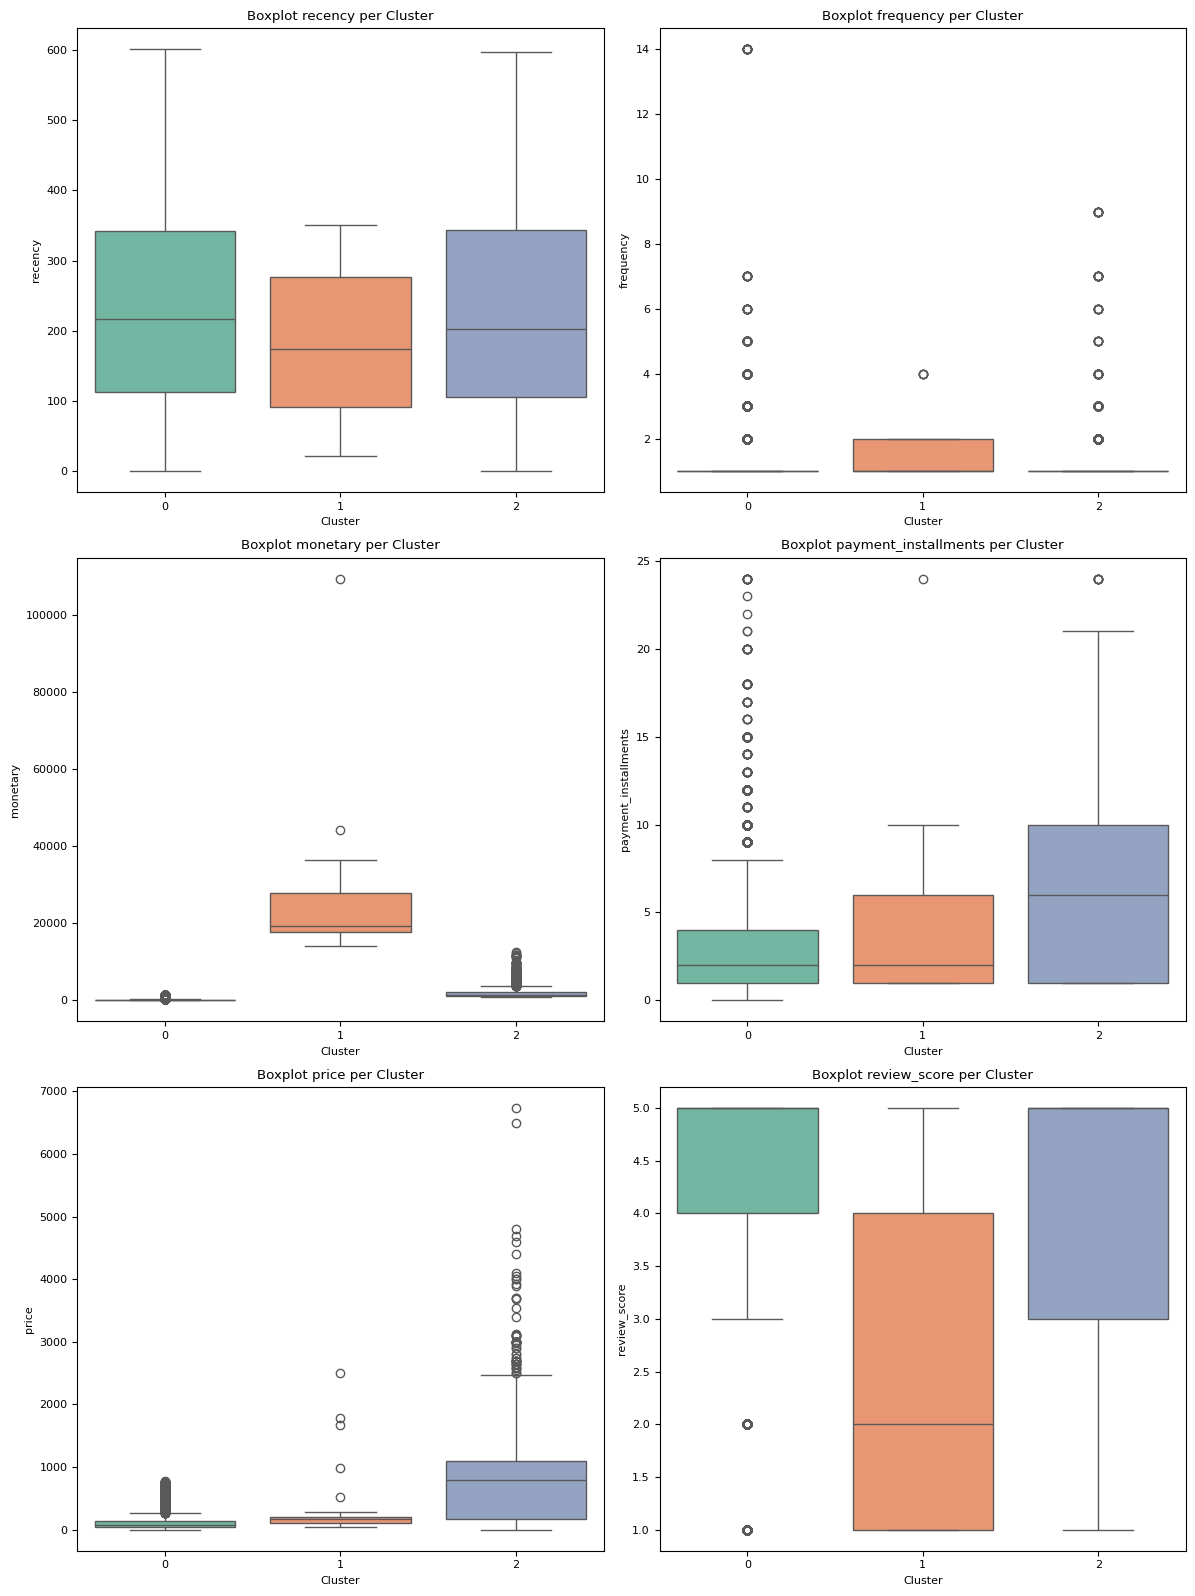

In [50]:
# Boxplot variabel setiap cluster K=3
fitur_boxplot = ['recency', 'frequency', 'monetary', 'payment_installments', 'price', 'review_score']

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()

# Loop boxplot
for i, feature in enumerate(fitur_boxplot):
    sns.boxplot(
        x='cluster',
        y=feature,
        data=df_model,
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f'Boxplot {feature} per Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

`K = 4`

In [51]:
# Membuat pipeline
pipeline4 = Pipeline([
    ("scaler", RobustScaler()),
    ("kmeans", KMeans(n_clusters=4, random_state=42, n_init=10))
])

# Fit K-Means dengan K=4
fitur_kmeans = ['recency', 'frequency', 'monetary', 'payment_installments', 'price', 'review_score']
df_model['cluster'] = pipeline4.fit_predict(df_model[fitur_kmeans])

# Hitung statistik per cluster untuk labeling
cluster_summary = df_model.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'payment_installments': 'mean',
    'price': 'mean',
    'review_score': 'mean'
}).reset_index()
cluster_summary.columns = ['Cluster', 'Avg Recency', 'Avg Frequency', 'Avg Monetary', 'Avg Payment Installment', 'Avg Price', 'Avg Review Score']

print("="*70)
print("CLUSTER SUMMARY")
print("="*70)
print(cluster_summary.to_string(index=False))

# Label clusters berdasarkan karakteristik RFM
# Sort by Monetary descending untuk assign label
cluster_summary_sorted = cluster_summary.sort_values('Avg Price', ascending=False)

CLUSTER SUMMARY
 Cluster  Avg Recency  Avg Frequency  Avg Monetary  Avg Payment Installment   Avg Price  Avg Review Score
       0   230.085366       1.259684   1816.067884                 5.774390  763.627023          3.875538
       1   234.320955       1.068080    165.571641                 2.825523  105.549258          4.167278
       2   333.000000       1.000000 109312.640000                 1.000000 1680.000000          1.000000
       3   185.000000       1.555556  19308.213611                 4.472222  340.588889          2.694444


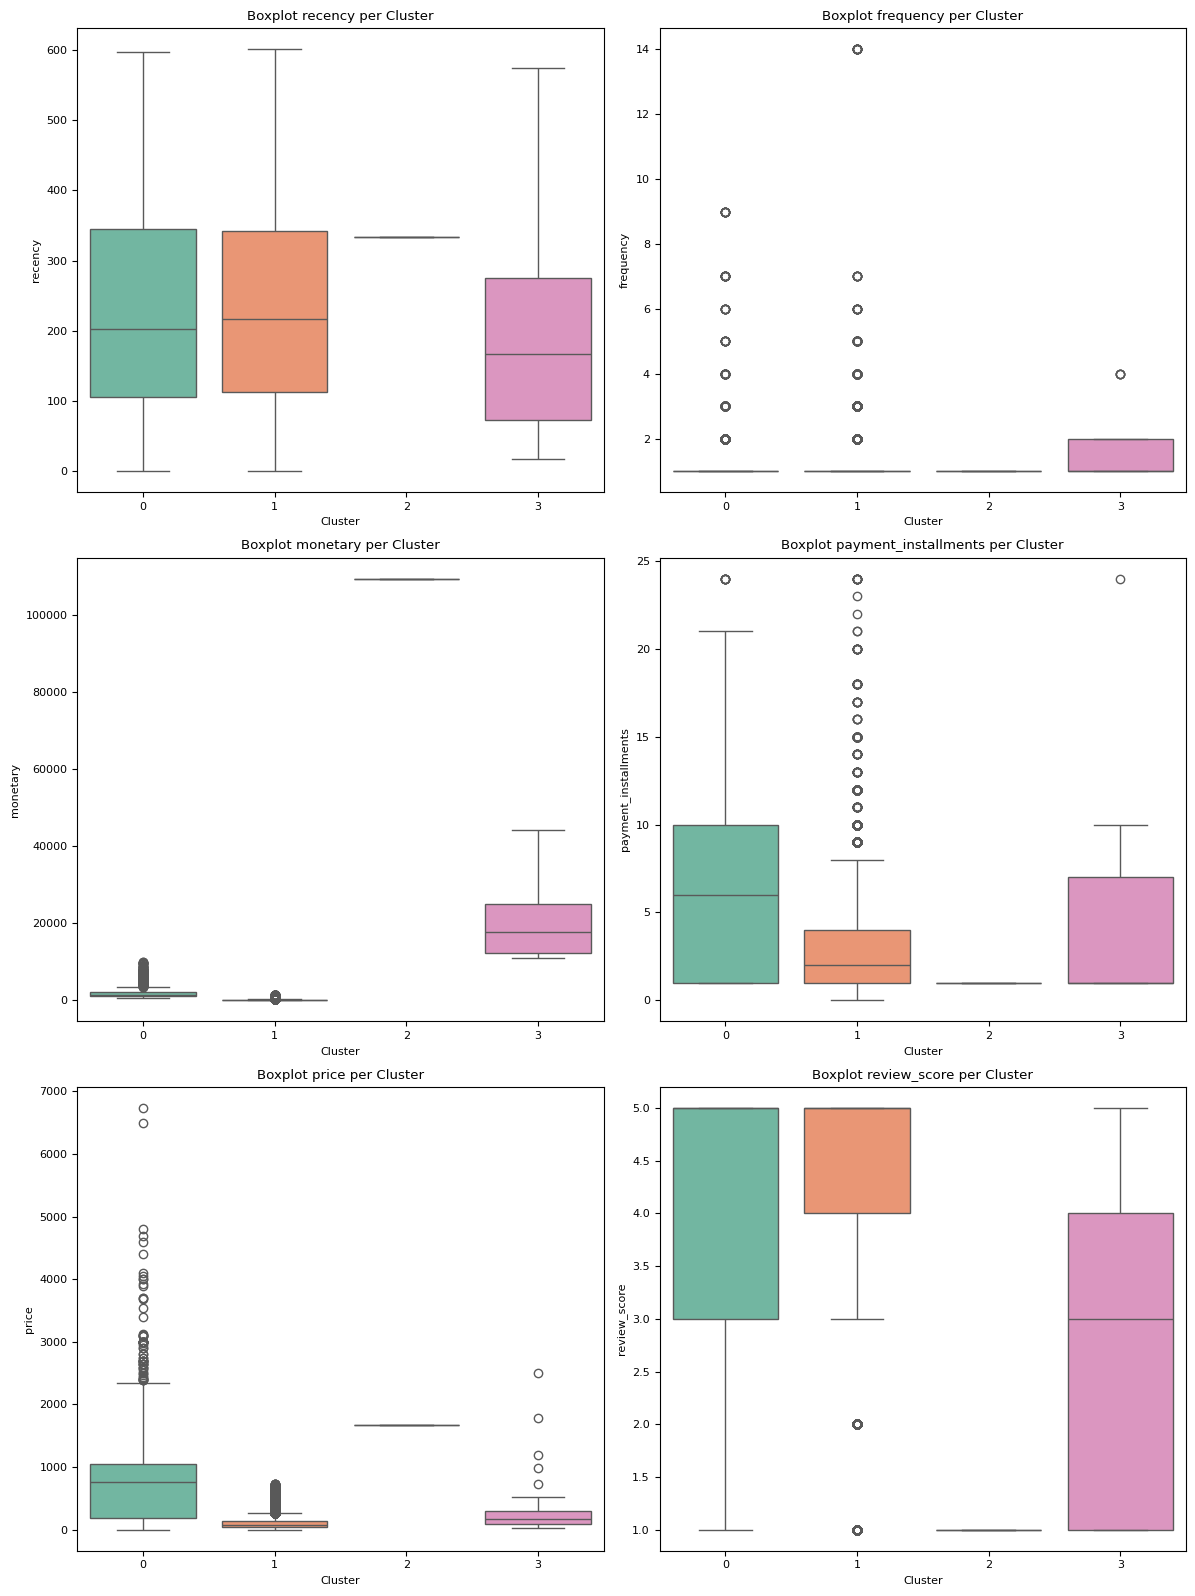

In [52]:
# Boxplot variabel setiap cluster K=4
fitur_boxplot = ['recency', 'frequency', 'monetary', 'payment_installments', 'price', 'review_score']

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()

# Loop boxplot
for i, feature in enumerate(fitur_boxplot):
    sns.boxplot(
        x='cluster',
        y=feature,
        data=df_model,
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f'Boxplot {feature} per Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

Berdasarkan boxplot setiap fitur numerik dari setiap nilai K, K = 3 menghasilkan segmentasi dengan perbedaan karakteristik yang cukup jelas, terutama pada aspek monetary, price, payment installments, dan review score. Sementara itu, recency relatif mirip antar cluster sehingga bukan pembeda utama. 

**1. Recency**
- Ketiga cluster memiliki median recency yang relatif mirip (sekitar ±180–220 hari).
- Tidak ada cluster yang sangat dominan sebagai pelanggan paling aktif atau paling tidak aktif.
- Recency bukan pembeda utama dalam segmentasi ini.

**2. Frequency**
- Cluster 1: Frequency rendah dan stabil (median ≈ 1–2), didominasi pelanggan one-time buyer.
- Cluster 0: Frequency lebih bervariasi, terdapat beberapa outlier yang menunjukkan repeat purchase.
- Cluster 2: Median frequency tetap rendah, namun terdapat outlier cukup tinggi, menunjukkan sebagian kecil pelanggan dengan repeat purchase lebih sering.

**3. Monetary**
- Cluster 1: Nilai monetary paling tinggi (median jauh di atas cluster lain) dengan outlier ekstrem → high spender.
- Cluster 2: Monetary rendah–menengah, dengan beberapa outlier besar.
- Cluster 0: Monetary paling rendah, mayoritas transaksi bernilai kecil.

**4. Payment Installments**
- Cluster 2: Median penggunaan cicilan paling tinggi, menunjukkan kecenderungan membeli produk dengan cicilan.
- Cluster 1: Penggunaan cicilan rendah–menengah.
- Cluster 0: Penggunaan cicilan paling rendah dan relatif stabil.

**5. Price**
- Cluster 2: Median harga paling tinggi dengan sebaran sangat lebar dan banyak outlier → produk premium/high-ticket.
- Cluster 1: Harga rendah–menengah, dengan beberapa outlier tinggi.
- Cluster 0: Harga paling rendah dan relatif stabil → produk low-cost.

**6. Review Score**
- Cluster 0: Review score paling tinggi dan konsisten (dominan 4–5).
- Cluster 2: Review score tinggi tetapi lebih bervariasi.
- Cluster 1: Review score paling rendah (dominan 1–3), menunjukkan potensi isu kepuasan.

### **Distribusi Pelanggan Setiap Cluster**

In [53]:
# Fit K-Means dengan K=3
fitur_kmeans = ['recency', 'frequency', 'monetary', 'payment_installments', 'price', 'review_score']
df_model['cluster'] = pipeline3.fit_predict(df_model[fitur_kmeans])

# Hitung jumlah per cluster
cluster_counts = df_model['cluster'].value_counts().sort_index()

# Hitung persentase
cluster_percent = df_model['cluster'].value_counts(normalize=True).sort_index() * 100

# Gabungkan ke satu dataframe
cluster_summary = pd.DataFrame({
    'count': cluster_counts,
    'percent': cluster_percent.round(2)
})

print(cluster_summary)

         count  percent
cluster                
0        91646    97.27
1           26     0.03
2         2546     2.70


**Persentase pelanggan per Cluster**:

- Cluster 0 : 97,27%
- Cluster 1 : 0,03%
- Cluster 2 : 2,70%

### **Karakteristik Tiap Cluster**

#### **Karakteristik Tiap Cluster berdasarkan Fitur Kategorik**

##### `Product Category`

In [54]:
# Produk Kategori Cluster 0
df_cluster0 = df_model[df_model['cluster'] == 0]

category_dist = (
    df_cluster0['product_category_name_english']
    .value_counts()
    .reset_index()
)

category_dist.columns = ['Product Category', 'Count']
category_dist.head()

,Product Category,Count
0,bed_bath_table,8907
1,health_beauty,8336
2,sports_leisure,7286
3,computers_accessories,6224
4,furniture_decor,5967


In [55]:
# Produk Kategori Cluster 1
df_cluster1 = df_model[df_model['cluster'] == 1]

category_dist = (
    df_cluster1['product_category_name_english']
    .value_counts()
    .reset_index()
)

category_dist.columns = ['Product Category', 'Count']
category_dist.head()

,Product Category,Count
0,office_furniture,4
1,telephony,4
2,computers_accessories,3
3,fixed_telephony,2
4,bed_bath_table,2


In [56]:
# Produk Kategori Cluster 2
df_cluster2 = df_model[df_model['cluster'] == 2]

category_dist = (
    df_cluster2['product_category_name_english']
    .value_counts()
    .reset_index()
)

category_dist.columns = ['Product Category', 'Count']
category_dist.head()

,Product Category,Count
0,watches_gifts,265
1,computers_accessories,231
2,health_beauty,190
3,bed_bath_table,155
4,furniture_decor,148


**Product Category:**
- Cluster 0
    - Product category yang dominan dan banyak dibeli oleh pelanggan pada Cluster 0 adalah bed_bath_table.
- Cluster 1
    - Product category yang dominan dan banyak dibeli oleh pelanggan pada Cluster 1 adalah office_furniture.
- Cluster 2
    - Product category yang dominan dan banyak dibeli oleh pelanggan pada Cluster 2 adalah watches_gift.

##### `Payment Method`

In [58]:
# Payment Method Cluster 0
df_cluster0 = df_model[df_model['cluster'] == 0]

payment_dist = (
    df_cluster0['payment_type']
    .value_counts()
    .reset_index()
)

payment_dist.columns = ['Payment Method', 'Count']
payment_dist.head()

,Payment Method,Count
0,credit_card,69490
1,boleto,18256
2,voucher,2477
3,debit_card,1423


In [59]:
# Payment Method Cluster 1
df_cluster1 = df_model[df_model['cluster'] == 1]

payment_dist = (
    df_cluster1['payment_type']
    .value_counts()
    .reset_index()
)

payment_dist.columns = ['Payment Method', 'Count']
payment_dist.head()

,Payment Method,Count
0,credit_card,15
1,boleto,11


In [60]:
# Payment Method Cluster 2
df_cluster2 = df_model[df_model['cluster'] == 2]

payment_dist = (
    df_cluster2['payment_type']
    .value_counts()
    .reset_index()
)

payment_dist.columns = ['Payment Method', 'Count']
payment_dist.head()

,Payment Method,Count
0,credit_card,1999
1,boleto,483
2,voucher,37
3,debit_card,27


**Payment Method:** Payment method yang dominan dan banyak digunakan sama pada tiap cluster, yaitu credit_card.

##### `Customer_City`

In [62]:
# Customer City Cluster 0
df_cluster0 = df_model[df_model['cluster'] == 0]

city_dist = (
    df_cluster0['customer_city']
    .value_counts()
    .reset_index()
)

city_dist.columns = ['customer_city', 'Count']
city_dist.head()

,customer_city,Count
0,sao paulo,14356
1,rio de janeiro,6195
2,belo horizonte,2569
3,brasilia,1970
4,curitiba,1412


In [63]:
# Customer City Cluster 1
df_cluster1 = df_model[df_model['cluster'] == 1]

city_dist = (
    df_cluster1['customer_city']
    .value_counts()
    .reset_index()
)

city_dist.columns = ['customer_city', 'Count']
city_dist.head()

,customer_city,Count
0,sao paulo,4
1,porto alegre,4
2,rio de janeiro,3
3,uniao da vitoria,2
4,cicero dantas,2


In [64]:
# Customer City Cluster 2
df_cluster2 = df_model[df_model['cluster'] == 2]

city_dist = (
    df_cluster2['customer_city']
    .value_counts()
    .reset_index()
)

city_dist.columns = ['customer_city', 'Count']
city_dist.head()

,customer_city,Count
0,sao paulo,321
1,rio de janeiro,201
2,belo horizonte,56
3,brasilia,56
4,curitiba,47


**Customer City:** Lokasi kota customer yang paling banyak order sama pada tiap cluster, yaitu Sao Paulo.

Berdasarkan analisis:
- Variabel **Recency relatif seragam di seluruh cluster, sehingga bukan faktor pembeda utama**. 
- **Product Category menunjukkan preferensi belanja yang berbeda antar cluster** dan **memperkuat karakteristik masing-masing segmen**.
    - Cluster 0 → bed_bath_table (produk rumah tangga low-cost)
    - Cluster 1 → office_furniture (furnitur bernilai besar)
    - Cluster 2 → watches_gift (produk premium/gift)
- Payment Method (credit_card) dan Customer City (Sao Paulo) tidak menjadi pembeda, karena sama di seluruh cluster.
- Segmentasi lebih didorong oleh Frequency, Monetary, Price, dan Payment Installments. Segmentasi paling kuat terbentuk dari kombinasi F, M, dan Payment Installments.


**Customer Segmentation by All Features (Numerical & Categorical)**

| Cluster       | Frequency                             | Monetary                             | Payment Installments | Price                      | Review Score         | Dominant Product Category | Dominant Payment Method | Dominant Customer City |
| ------------- | ------------------------------------- | ------------------------------------ | -------------------- | -------------------------- | -------------------- | ------------------------- | ----------------------- | ---------------------- |
| **Cluster 0** | Medium (lebih bervariasi, ada repeat) | Low (transaksi kecil)                | Low                  | Low (low-cost)             | High (dominan 4–5)   | bed_bath_table            | credit_card             | Sao Paulo              |
| **Cluster 1** | Low (didominasi 1 transaksi)          | High (paling tinggi, banyak outlier) | Low–Medium           | Low–Medium                 | Low (dominan 1–3)    | office_furniture          | credit_card             | Sao Paulo              |
| **Cluster 2** | Low (ada outlier repeat)              | Low–Medium                           | High                 | High (premium/high-ticket) | High tapi bervariasi | watches_gift              | credit_card             | Sao Paulo              |



| Cluster     | Cluster Name                  | Karakteristik Utama |
|------------|-------------------------------|-------------------|
| **Cluster 0** | **Satisfied & Low-Spend Buyers** | Pelanggan dengan frekuensi pembelian cukup aktif dan terdapat repeat order, namun nilai transaksi dan harga produk cenderung rendah dengan penggunaan cicilan minimal. Review score tinggi menunjukkan pengalaman belanja yang positif. Pembelian dominan pada kategori kebutuhan rumah, menggunakan credit card, dan terkonsentrasi di Sao Paulo. Segmen ini puas, sensitif harga, dan berpotensi ditingkatkan melalui upsell ringan. |
| **Cluster 1** | **High-Spend At-Risk Buyers** | Pelanggan dengan frekuensi transaksi rendah tetapi menghasilkan nilai monetary tertinggi dengan beberapa pembelian bernilai besar. Harga produk umumnya low–medium dengan cicilan rendah–menengah. Review score rendah menandakan risiko ketidakpuasan. Didominasi kategori office_furniture, metode bayar credit card, dan wilayah Sao Paulo. Segmen bernilai tinggi namun berisiko churn dan perlu prioritas perbaikan layanan. |
| **Cluster 2** | **Premium Installment Buyers** | Pelanggan dengan frekuensi rendah tetapi membeli produk berharga tinggi dengan penggunaan cicilan paling tinggi. Nilai monetary total tidak setinggi cluster high spender karena jarangnya transaksi, namun nilai per order besar. Review relatif baik walau bervariasi. Dominan kategori produk premium, pembayaran credit card, dan terkonsentrasi di Sao Paulo. Mewakili pembeli premium berbasis installment. |

# **Conclusion and Recommendation**

## **Conclusion**

Berdasarkan analisis data transaksi e-commerce, perilaku pelanggan, performa operasional, serta segmentasi pelanggan, diperoleh berbagai insight utama yang relevan untuk mendukung pengambilan keputusan bisnis secara strategis, sebagai berikut:

### **1. Order Trend, Volume & Time Pattern**
- Volume order tertinggi terjadi di **awal minggu**, khususnya pada hari **Senin dan Selasa**. Customer paling aktif melakukan transaksi pada rentang waktu **10:00 – 22:00**, dengan **peak hours pada 10:00 – 16:00**. Hal menunjukkan bahwa aktivitas belanja didominasi pada **jam kerja dan siang hari**, yang dapat dimanfaatkan untuk optimasi waktu campaign dan promosi.
- Terdapat tren **peningkatan jumlah order secara konsisten** dari Januari 2017 hingga Agustus 2018. Lonjakan signifikan terjadi mulai **Oktober 2017**, dengan puncak pada **November 2017**, yang kemungkinan besar dipengaruhi oleh event **Black Friday** di Brazil. Hal ini mengindikasikan bahwa event-event tertentu dan promosi besar memiliki dampak kuat terhadap volume transaksi.

### **2. Revenue Trend**
- Revenue menunjukkan **tren pertumbuhan yang jelas** dari tahun ke tahun. Terjadi peningkatan konsisten dari **2017 ke 2018**, dan lonjakan yang lebih signifikan pada **2018**. Pola ini mencerminkan pertumbuhan bisnis yang kuat dan berkelanjutan.

### **3. Geographic Distribution**
- Kota **Sao Paulo** mendominasi jumlah order secara signifikan, diikuti oleh **Rio de Janeiro**. State **São Paulo (SP)** juga merupakan **kontributor order terbesar secara nasional**. State lain seperti **RJ, MG, RS, dan PR** berada pada tier kedua. Demand e-commerce masih sangat terkonsentrasi di wilayah ekonomi utama/kota metropolitan Brazil, hal ini dapat dilihat dari gap besar antara kota besar dengan kota lainnya. Strategi **marketing, inventory, dan fulfillment** akan paling optimal jika difokuskan pada kota dengan volume order tertinggi, khususnya **Sao Paulo**.

### **4. Product Category & Payment Behavior**
- Dua kategori produk dengan jumlah order terbanyak adalah: **bed_bath_table** dan **health_beauty**.
- Hal ini menunjukkan bahwa produk kebutuhan rumah tangga dan personal care merupakan kontributor utama terhadap volume transaksi.
- Metode pembayaran yang paling dominan adalah **credit card**, dengan mayoritas transaksi dilakukan **tanpa cicilan**.
- Pola ini menunjukkan **preferensi pelanggan terhadap metode pembayaran yang praktis serta kecenderungan melakukan pembayaran penuh**.

### **5. Review Score & Delivery Performance**
- Sebesar **21%** review berada pada kategori buruk (review score 1–3) yang dikategorikan sebagai review buruk pada analisis ini.
- Analisis menunjukkan bahwa semakin lama pengiriman, semakin rendah rating yang diberikan. 
- Analisis delivery time menunjukkan bahwa bottleneck utama terjadi pada tahap **carrier → customer (last-mile delivery)** yang merupakan tahap paling lama dan paling variatif.

### **6. RFM & Cohort Analysis (Customer Behavior & Retention)**
- Analisis RFM menunjukkan bahwa hampir seluruh pelanggan memiliki **frequency = 1**, yang berarti pelanggan hanya melakukan **satu kali transaksi** dan tidak melakukan pembelian ulang. Kondisi ini menyebabkan **metode RFM konvensional tidak dapat digunakan secara efektif** untuk segmentasi pelanggan.
- Hasil **cohort analysis** menunjukkan bahwa **retention rate pelanggan sangat rendah (di bawah 1%)**.
- Segmentasi pelanggan dialihkan menggunakan **Machine Learning dengan Unsupervised Learning (K-Means Clustering)** untuk tetap dapat mengelompokkan pelanggan berdasarkan karakteristik pelanggan lainnya.
- Konsistensi antara hasil RFM dan cohort analysis mengindikasikan bahwa **tantangan utama bisnis berada pada rendahnya retensi dan repeat purchase**, bukan pada akuisisi pelanggan.

### **7. Hasil RFM**
| Segment                         | Jumlah | Persentase |
| ------------------------------- | -----: | ---------: |
| **Promising**                   | 31,566 |  **34.6%** |
| **New customers**               | 18,014 |  **19.8%** |
| **Cannot lose them but losing** | 17,425 |  **19.1%** |
| **Lost customers**              |  7,460 |       8.2% |
| **Hibernating customers**       |  7,363 |       8.1% |
| **About to sleep**              |  7,049 |       7.7% |
| **Champions**                   |    944 |       1.0% |
| **Loyal**                       |    488 |       0.5% |
| **At risk**                     |    611 |       0.7% |
| **Potential loyalist**          |    305 |       0.3% |

Total customer base didominasi segmen mid–low engagement.


### **8. Customer Segmentation (Machine Learning Clustering)**

- **Variabel Recency relatif seragam di seluruh cluster** sehingga **bukan faktor pembeda utama**. **Segmentasi pelanggan lebih didorong oleh pola transaksi dan nilai belanja**, bukan oleh waktu transaksi terakhir.
- **Product Category menunjukkan preferensi belanja yang berbeda antar cluster** dan **memperkuat karakteristik masing-masing segmen**.
- **Payment Method dan Customer City tidak menjadi pembeda antar cluster** karena tidak ada perbedaan pada seluruh cluster.
- **Segmentasi paling kuat terbentuk dari kombinasi Frequency, Monetary, Price dan Payment Installments**.

Pelanggan Olist terbagi ke dalam **3 cluster** berdasarkan KMeans Clustering :
- Cluster 0 : 97,27%
- Cluster 1 : 0,03%
- Cluster 2 : 2,70%

Berdasarkan persentase, mayoritas pelanggan berada di **Cluster 0** sebesar 97,27%, diikuti oleh **Cluster 2** sebesar 2,7%. **Cluster 1** merepresentasikan segmen yang relatif kecil dengan persentase 0,03%. Ketiga cluster ini merupakan segment dengan **karakteristik berbeda yang membutuhkan strategi yang lebih spesifik dan targeted**.

### **9. Karakteristik Segmentasi Pelanggan per Cluster**

**Customer Segmentation - Cluster & Characteristics (Summary)**

| Cluster       | Frequency                             | Monetary                             | Payment Installments | Price                      | Review Score         | Dominant Product Category | Dominant Payment Method | Dominant Customer City |
| ------------- | ------------------------------------- | ------------------------------------ | -------------------- | -------------------------- | -------------------- | ------------------------- | ----------------------- | ---------------------- |
| **Cluster 0** | Medium (lebih bervariasi, ada repeat) | Low (transaksi kecil)                | Low                  | Low (low-cost)             | High (dominan 4–5)   | bed_bath_table            | credit_card             | Sao Paulo              |
| **Cluster 1** | Low (didominasi 1 transaksi)          | High (paling tinggi, banyak outlier) | Low–Medium           | Low–Medium                 | Low (dominan 1–3)    | office_furniture          | credit_card             | Sao Paulo              |
| **Cluster 2** | Low (ada outlier repeat)              | Low–Medium                           | High                 | High (premium/high-ticket) | High tapi bervariasi | watches_gift              | credit_card             | Sao Paulo              |

<br>

| Cluster     | Cluster Name                  | Karakteristik Utama |
|------------|-------------------------------|-------------------|
| **Cluster 0** | **Satisfied & Low-Spend Buyers** | Pelanggan dengan frekuensi pembelian cukup aktif dan terdapat repeat order, namun nilai transaksi dan harga produk cenderung rendah dengan penggunaan cicilan minimal. Review score tinggi menunjukkan pengalaman belanja yang positif. Pembelian dominan pada kategori kebutuhan rumah, menggunakan credit card, dan terkonsentrasi di Sao Paulo. Segmen ini puas, sensitif harga, dan berpotensi ditingkatkan melalui upsell ringan. |
| **Cluster 1** | **High-Spend At-Risk Buyers** | Pelanggan dengan frekuensi transaksi rendah tetapi menghasilkan nilai monetary tertinggi dengan beberapa pembelian bernilai besar. Harga produk umumnya low–medium dengan cicilan rendah–menengah. Review score rendah menandakan risiko ketidakpuasan. Didominasi kategori office_furniture, metode bayar credit card, dan wilayah Sao Paulo. Segmen bernilai tinggi namun berisiko churn dan perlu prioritas perbaikan layanan. |
| **Cluster 2** | **Premium Installment Buyers** | Pelanggan dengan frekuensi rendah tetapi membeli produk berharga tinggi dengan penggunaan cicilan paling tinggi. Nilai monetary total tidak setinggi cluster high spender karena jarangnya transaksi, namun nilai per order besar. Review relatif baik walau bervariasi. Dominan kategori produk premium, pembayaran credit card, dan terkonsentrasi di Sao Paulo. Mewakili pembeli premium berbasis installment. |

## **Action Recommendations**

Berdasarkan seluruh insight yang diperoleh, berikut rekomendasi strategis utama bagi bisnis:

- **Optimasi campaign timing** pada **awal minggu dan peak hours (10:00–16:00) untuk memaksimalkan konversi**.
- **Maksimalkan event-based promotion** (seperti Black Friday) karena **terbukti mendorong lonjakan order secara signifikan**.
- **Fokus pada wilayah geografis dengan jumlah pelanggan terbanyak/volume tinggi** yaitu pada São Paulo untuk meningkatkan efisiensi marketing dan fulfillment.
- **Prioritaskan kategori kebutuhan rumah tangga dan personal care** sebagai driver utama volume transaksi dan juga untuk **perencanaan inventory dan supply chain** dengan tujuan untuk memastikan ketersediaan stok pada kategori dengan demand tertinggi serta meminimalkan risiko stockout dan lost sales.
- **Perkuat monitoring dan evaluasi performa carrier**, khususnya pada last-mile delivery, untuk menurunkan keterlambatan dan meningkatkan review score.
- **Fokus pada strategi retensi dan pemasaran berdasarkan cluster pelanggan**

## **Delivery Time Optimization**
**Fokus utama perbaikan pada performa pengiriman** sebaiknya diarahkan pada **optimalisasi last-mile delivery dan manajemen performa carrier**, karena area ini merupakan bottleneck utama yang berdampak langsung pada **review score dan pengalaman pelanggan**.

1. **Carrier Performance Management**
   - Terapkan SLA yang lebih ketat dan monitoring rutin performa carrier.
   - Gunakan dashboard untuk memantau delivery time dan tingkat keterlambatan per carrier.
   - Evaluasi atau renegosiasi kontrak dengan carrier berkinerja rendah.

2. **Carrier & Route Optimization**
   - Segmentasi berdasarkan carrier dan rute untuk mengidentifikasi bottleneck.
   - Optimalkan alokasi carrier pada rute dengan tingkat keterlambatan tinggi.

3. **Proactive Customer Communication**
   - Kirim notifikasi proaktif jika terjadi potensi keterlambatan.
   - Berikan estimasi delivery yang lebih realistis untuk mengelola ekspektasi pelanggan.

4. **Service Recovery & Review Management**
   - Berikan kompensasi (voucher, free shipping, diskon) untuk keterlambatan signifikan.
   - Prioritaskan follow-up pada order dengan delivery time tinggi untuk mencegah review buruk.

## **Strategi Campaign & Retention per Cluster**

| Cluster       | Segment                        | Characteristics                                                                                                                                                                                 | Tujuan Utama                                                                 | Strategi Retention                                                                                                                             | Strategi Campaign                                                                                                                                          |
| ------------- | ------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | **Satisfied & Low-Spend Buyers** | Pelanggan dengan nilai transaksi kecil, harga produk rendah, penggunaan cicilan rendah, namun memiliki review score tinggi. Didominasi pembelian produk kategori *bed_bath_table*.              | Meningkatkan average order value (AOV) dan mendorong upsell ringan           | - Loyalty points untuk pembelian berulang<br>- Gratis ongkir dengan minimum spend rendah–menengah<br>- Reminder campaign untuk repeat purchase | - Bundle produk *bed_bath_table* (mix low & mid-price)<br>- Cross-selling produk pelengkap rumah tangga<br>- Flash sale ringan untuk dorong impulse buying |
| **Cluster 1** | **High-Spend At-Risk Buyers**  | High spender dengan frekuensi rendah, review score rendah, dan dominasi kategori *office_furniture*. Segmen bernilai tinggi namun berisiko churn.                                               | Menurunkan churn dan meningkatkan kepuasan pelanggan bernilai tinggi         | - Priority customer service<br>- Proactive follow-up setelah pembelian besar<br>- Service recovery untuk review rendah                         | - Penawaran eksklusif *office_furniture*<br>- Extended warranty / free installation<br>- Voucher kompensasi untuk pengalaman negatif                       |
| **Cluster 2** | **Premium Installment Buyers** | Pembeli produk premium dengan harga tinggi dan penggunaan cicilan tinggi. Frekuensi rendah, nilai transaksi besar, review score cukup tinggi namun bervariasi. Dominan kategori *watches_gift*. | Meningkatkan customer lifetime value (CLV) dan mempertahankan segmen premium | - VIP customer program<br>- Dedicated customer support<br>- Reminder untuk upgrade/premium products                                            | - Promo cicilan 0% / extended installment<br>- Early access produk premium & gift edition<br>- Personalized premium recommendations                        |

# **Limitasi Model**

1. Hasil pemodelan sangat bergantung pada jumlah cluster (k) yang digunakan dan tidak ada nilai k yang pasti benar atau tepat untuk digunakan, sehingga pemilihan k sangat bergantung pada metode evaluasi dan interpretasi subjektif.
2. Model clustering tidak otomatis menyesuaikan dengan perubahan pola customer, sehingga cluster bisa menjadi tidak relevan seiring waktu.
3. Model kurang mampu menangkap hubungan non-linear antar fitur, sementara perilaku pelanggan sering kali memiliki pola yang kompleks dan saling tumpang tindih.
4. Keberadaan data ekstrem atau outlier dapat memengaruhi posisi centroid sehingga hasil segmentasi menjadi kurang representatif.
5. Penamaan dan makna dari setiap cluster bergantung pada interpretasi fitur yang dapat menyebabkan risiko over-interpretation atau bias dalam memberi label segmen. 

# **Model Recommendation (Future Work)**

Berdasarkan limitasi model tersebut, saran yang dapat kami berikan untuk pengembangan penelitian atau analisis selanjutnya yaitu:
1. Menerapkan metode clustering alternatif seperti DBSCAN, Hierarchical Clustering, atau Gaussian Mixture Model untuk membandingkan hasil segmentasi dan mengatasi keterbatasan K-Means.
2. Melakukan penanganan pada data ekstrem secara lebih sistematis, seperti log transformation, agar tidak mempengaruhi hasil clustering.
3. Menambahkan beberapa fitur perilaku pelanggan, seperti customer lifetime value dan average order value.
4. Menguji stabilitas dan konsistensi cluster pada periode data yang berbeda.

# **Save Model to Pickle**

In [66]:
# Save pipeline ke file pickle
with open("rfm_kmeans_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline3, f)